In [30]:
from movie_reviews import Review
from stemmer import Stemmer
import json
import numpy as np
from tqdm import tqdm
from collections import defaultdict

In [31]:
stemmer = Stemmer("root_dict.json")

In [32]:
# f = open("reviews_dict.json", "r")
# json_reviews = json.loads(f.read())
# f.close()

In [33]:
# reviews = []

# for review in json_reviews:
#     reviews.append(Review.from_json(json_reviews[review]))

In [34]:
stop_list = ['.', ',', '"', ')', '(', ':', ';', '?', '!', '\'', '–', '-', '{', '}', '\xa0']

def sanitize_text(text):
    temp = text.lower()
    for element in stop_list:
        temp = temp.replace(element, " ")
        
    for j in range(10):
        temp = temp.replace("  ", " ")

    temp = temp.split(" ")
    stemmed_text = ""
    for word in temp:
        found = stemmer.find(word) 
        if found:
            stemmed_text += found.replace(" ","") #sometimes word has space in the end
        else:
            stemmed_text += word
        stemmed_text += " "
    
    return stemmed_text

In [39]:
import pandas as pd
df = pd.read_csv("data/short_reviews_bert_10_1_50.csv")

In [40]:
df.head()

content  rating
0  Z każdym kolejnym razem, ten film wydaje mi si...       9
1  Mamy tutaj do czynienia z typowym amerykańskim...       4
2  lecz jeśli znasz kogoś kto oglądał ten film i ...      10
3  że gdyby nie płonąca scena egzekucji,mógłby ro...       5
4  Dopiero po przeczytaniu książki i obejrzeniu f...      10

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

7.629788790344701


(array([ 2061.,  1266.,  3030.,  3056.,  4842.,  6597., 12001., 18167.,
        16226., 20250.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

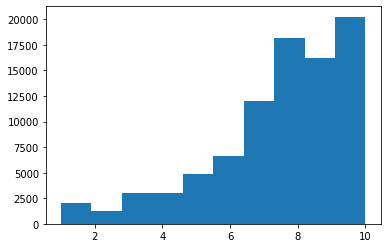

In [42]:
df_sanitized = df.copy()
df_sanitized['content'] = df_sanitized['content'].apply(sanitize_text) 
X = df_sanitized['content']
y = df_sanitized['rating'].array
print(np.mean(y))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.hist(y)

In [43]:
# print(X_train.to_numpy()[0], y_train[0])

In [44]:
print(X[0])
clf = TfidfVectorizer(ngram_range=(2,2))
matrix = clf.fit_transform(X)

z każdy kolejny raz ten film wydawać mi się lepszy oglądać on średni co 2 rok i za każdy raz ktoś mi kroić cebula przed nos według miąć były to rola żyć duncan zagrać po mistrzowski  


In [48]:
# matrix[]
# clf.get_feature_names()[5400:5500]
# matrix[0, :].__dict__

from collections import defaultdict
words_list = []


feature_dict = defaultdict(str)
for i, e in enumerate(clf.get_feature_names()):
    feature_dict[i] = e

for k in tqdm(range(matrix.shape[0])):
    words = {}
    for i, index in enumerate(matrix[k, :].indices):
#         print(i, index)
        words[feature_dict[index]] = matrix[k, :].data[i]
    
    words_list.append(words)
#     break

100%|██████████| 87496/87496 [02:34<00:00, 568.14it/s]


In [50]:
print(words_list[0])

{'po mistrzowski': 0.16430955727920224, 'zagrać po': 0.17878959788571613, 'duncan zagrać': 0.23140511936247884, 'żyć duncan': 0.23140511936247884, 'rola żyć': 0.16995282779216667, 'to rola': 0.1798694934718654, 'były to': 0.14920157617797958, 'miąć były': 0.17827024662996258, 'według miąć': 0.11257141567143612, 'nos według': 0.23140511936247884, 'przed nos': 0.22092641088429665, 'cebula przed': 0.23140511936247884, 'kroić cebula': 0.21718639794436748, 'mi kroić': 0.23140511936247884, 'ktoś mi': 0.14895442524998445, 'raz ktoś': 0.22092641088429665, 'każdy raz': 0.1204250631611781, 'za każdy': 0.12265099375374838, 'rok za': 0.18221642491206905, 'co rok': 0.15927000540226813, 'średni co': 0.19582276417176556, 'on średni': 0.19582276417176556, 'oglądać on': 0.11145573753062446, 'lepszy oglądać': 0.22092641088429665, 'się lepszy': 0.17029759689732094, 'mi się': 0.07665336788496933, 'wydawać mi': 0.11749571080043468, 'film wydawać': 0.1567863000263826, 'ten film': 0.0571570801220276, 'raz te

In [51]:
print(X[0])

z każdy kolejny raz ten film wydawać mi się lepszy oglądać on średni co 2 rok i za każdy raz ktoś mi kroić cebula przed nos według miąć były to rola żyć duncan zagrać po mistrzowski  


In [52]:
count_dict = defaultdict(int)
sums_dict = defaultdict(int)

my = np.mean(y)
for index, mini_dict in enumerate(tqdm(words_list)):
    for key in mini_dict.keys():
        if key == "":
            continue
        temp = abs(y[index] - 5)
        count_dict[key] += 1
        sums_dict[key] += mini_dict[key] * temp

100%|██████████| 87496/87496 [00:05<00:00, 17338.54it/s]


In [53]:
avg_dict = defaultdict(int)

for key in sums_dict.keys():
    if count_dict[key] < 10:
        continue
    avg_dict[key] = sums_dict[key] / count_dict[key]

In [54]:
df2 = pd.DataFrame.from_dict(avg_dict, orient="index")
# df2.head()
print(df2[0].describe())
print(df2.sort_values(by=0, ascending=False).head(50))
df2.sort_values(by=0, ascending=True).head(50)

count    30316.000000
mean         0.504796
std          0.137373
min          0.097397
25%          0.411414
50%          0.485793
75%          0.578168
max          2.071078
Name: 0, dtype: float64
                                0
kochać kochać            2.071078
krótki za                1.795146
spoiler spoiler          1.666395
polecać polecać          1.642269
super filmik             1.286203
ująć polecać             1.254095
świetny ekranizacja      1.247326
wzruszający zabawny      1.211419
top 15                   1.197323
trailer na               1.196683
feature relat            1.184681
ił widzieć               1.178999
znajomy ił               1.178999
poruszający bardzo       1.170877
nisko ranking            1.167609
zdecydowany 10           1.160726
wzruszać do              1.160646
raz ciągły               1.159232
zagrać polecać           1.158558
prawdopodobny najlepszy  1.147521
średni znajomy           1.146291
ktoś kiedy               1.145190
super świetny     

0
spodziewać czegoś    0.097397
na litość            0.102085
zły moment           0.106815
litość boski         0.117727
dług za              0.129525
ciekawy początek     0.136073
potencjał al         0.140721
niestety miąć        0.143696
mocny zawieść        0.149015
sam koncepcja        0.149550
czas jako            0.152567
przeciętny poziom    0.155651
poziom jednak        0.155695
obejrzeć zapomnieć   0.159783
on urwać             0.160577
twórczość ten        0.160614
zlepek scena         0.161766
jakis taki           0.162371
kilka fajny          0.162555
al daleki            0.164043
las tym              0.164204
dalej las            0.164537
czesc film           0.165054
jednak spodziewać    0.166637
miąć kiepski         0.166795
potraktować po       0.169618
co ratować           0.170151
bardzo płytki        0.170285
ogół mieć            0.171266
hurt locker          0.171360
razić po             0.172224
średni móc           0.172571
najwyżej przeciętny  0.174056
al szał              0.176848
mały żeby            0.176849
moment zacząć        0.176969
końcówka już         0.178247
raz raczy            0.180818
prostu zły           0.181792
niby fajny           0.181826
przeciętny on        0.182400
film średni          0.183000
przewidywalny już    0.183515
jakoś szczególny     0.184128
najgorszy on         0.184413
al nudny             0.184474
móc ciekawy          0.184568
miąć zwyczajny       0.184863
mocny przeciętny     0.185234
nagroda nominacja    0.185845

(array([1.900e+01, 1.740e+02, 7.270e+02, 2.709e+03, 5.403e+03, 6.759e+03,
        5.575e+03, 3.725e+03, 2.313e+03, 1.356e+03, 7.620e+02, 3.850e+02,
        2.010e+02, 9.800e+01, 6.500e+01, 2.600e+01, 1.200e+01, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.09739733, 0.16318669, 0.22897606, 0.29476542, 0.36055479,
        0.42634415, 0.49213352, 0.55792288, 0.62371225, 0.68950161,
        0.75529098, 0.82108034, 0.88686971, 0.95265907, 1.01844843,
        1.0842378 , 1.15002716, 1.21581653, 1.28160589, 1.34739526,
        1.41318462, 1.47897399, 1.54476335, 1.61055272, 1.67634208,
        1.74213145, 1.80792081, 1.87371018, 1.93949954, 2.00528891,
        2.07107827]),
 <a list of 30 Patch objects>)

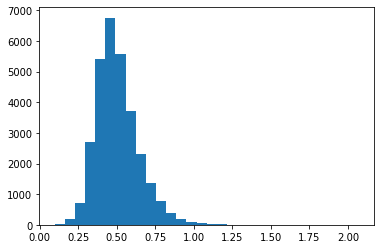

In [55]:
plt.hist(df2[0], bins=30)

In [ ]:
print(avg_dict[''])

In [ ]:
avg_dict['cebula przed']

In [ ]:
df.iloc[0]['content']

In [ ]:
X[0]

In [58]:
from sklearn.feature_extraction.text import CountVectorizer


num = 7
print(X[num])
# cv = CountVectorizer(ngram_range=(1,2))
# temp = cv.fit_transform(X[0].split(" "))

# print(temp.__dict__)
# print(temp)
for i, word in enumerate(X[num].split(" ")):
    ngram = X[num].split(" ")[i: i+2]
    ngram = " ".join(ngram)
    if ngram == "":
        continue
    print(ngram, avg_dict[ngram])
#     print(word, avg_dict[word])

zacząć się pewny od jakiś nawiedzinego gość w serwis filwebu podkręcić sztuczny pierwszy 100 tys głos i cieszyć się widzieć jak lud oglądać to co on polecić pot móc nawet odjąć ten extra głos jak się maszynka zacząć kręcić to działo już jak perpetum mobil ja w każdy raz dać się złapać po przeczytać opis film  
zacząć się 0.32023470630368633
się pewny 0.3949595415944068
pewny od 0
od jakiś 0.382054786822599
jakiś nawiedzinego 0
nawiedzinego gość 0
gość w 0
w serwis 0
serwis filwebu 0
filwebu podkręcić 0
podkręcić sztuczny 0
sztuczny pierwszy 0
pierwszy 100 0
100 tys 0
tys głos 0.35418263603037153
głos i 0
i cieszyć 0
cieszyć się 0.3893208459361436
się widzieć 0.4812430020453542
widzieć jak 0.41852091177111816
jak lud 0.41646611899850133
lud oglądać 0.6575975695371248
oglądać to 0.41414605971171814
to co 0.2723004638751973
co on 0.3013683385585004
on polecić 0.43981194502859905
polecić pot 0
pot móc 0
móc nawet 0.35818580359458946
nawet odjąć 0
odjąć ten 0
ten extra 0
extra głos 0
głos j

In [75]:
clf = CountVectorizer(ngram_range=(1,1))
matrix = clf.fit_transform(X)

In [76]:
data = []

feature_dict = defaultdict(str)
for i, e in enumerate(clf.get_feature_names()):
    feature_dict[i] = e

for k in tqdm(range(matrix.shape[0])):
    ngrams = defaultdict(int)
    for i, index in enumerate(matrix[k, :].indices):
        ngrams[feature_dict[index]] += matrix[k, :].data[i]
    data.append(ngrams)

# matrix[0, :].__dict__

100%|██████████| 87496/87496 [02:22<00:00, 613.17it/s]


In [77]:
from collections import defaultdict
from tqdm import tqdm

# all_dicts = []
count_dict = defaultdict(int)
sums_dict = defaultdict(int)

for index, mini_dict in enumerate(tqdm(data)):
    for key in mini_dict.keys():
        if key == "":
            continue
        temp = abs(y[index] - 5)
        count_dict[key] += 1
        sums_dict[key] += mini_dict[key] * temp
    #for word in sanitize_text(text).split(" "):
        if word == "":
            continue
        sums_dict[word] += abs(5 - y[i])
        count_dict[word] += 1
#     all_dicts.append(d_dict)


# vectorizer = CountVectorizer(ngram_range=(1,1))
# X_matrix = vectorizer.fit_transform(X_train)

100%|██████████| 87496/87496 [00:03<00:00, 24605.93it/s]


In [78]:
# print(all_dicts[0], y_train[0])

In [79]:
rev_dict = defaultdict(int)
for key in sums_dict.keys():
    if count_dict[key] < 30:
        continue
    rev_dict[key] = sums_dict[key] / count_dict[key]

(array([  1.,   0.,   0.,   4.,   8.,  12.,  15.,  27.,  32.,  43.,  67.,
         79., 119., 174., 224., 293., 389., 460., 509., 573., 565., 541.,
        478., 394., 265., 206., 178., 129.,  86.,  82.,  52.,  41.,  26.,
         12.,  21.,   9.,   7.,   8.,   7.,   3.,   1.,   3.,   0.,   5.,
          3.,   0.,   1.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([1.34210526, 1.43255966, 1.52301406, 1.61346845, 1.70392285,
        1.79437725, 1.88483164, 1.97528604, 2.06574044, 2.15619483,
        2.24664923, 2.33710363, 2.42755803, 2.51801242, 2.60846682,
        2.69892122, 2.78937561, 2.87983001, 2.97028441, 3.0607388 ,
        3.1511932 , 3.2416476 , 3.33210199, 3.42255639, 3.51301079,
        3.60346518, 3.69391958, 3.78437398, 3.87482838, 3.96528277,
        4.05573717, 4.14619157, 4.23664596, 4.32710036, 4.41755476,
        4.50800915, 4.59846355, 4.68891795, 4.

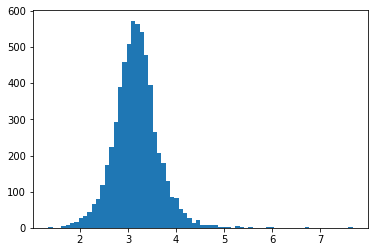

In [80]:
# print(rev_dict)
df_data = pd.DataFrame().from_dict(rev_dict, orient = 'index')#, index=[['word', 'value']])
# df.from_dict(rev_dict)

plt.hist(df_data[0], bins=70)

In [81]:
df_data.head()

0
każdy    3.844672
kolejny  3.180918
raz      4.018220
ten      4.224796
film     4.821080

In [82]:
df_data.describe()

0
count  6157.000000
mean      3.169896
std       0.466761
min       1.342105
25%       2.890625
50%       3.157047
75%       3.423280
max       7.673913

In [83]:
df2 = df_data.copy()
# df2[0] = df[0]
df2.sort_values(by=0, ascending=False, inplace=True)

0
relat       7.673913
bla         6.695652
spoiler     6.035608
on          5.983406
aragorn     5.900000
dinozaur    5.508475
he          5.400000
imax        5.354167
asterix     5.324324
dracula     5.316667
mln         5.288462
prot        5.281250
spojler     5.268519
feature     5.253846
mozart      5.138889
this        5.108696
ork         5.081633
darth       5.022222
rocky       4.954128
truman      4.945946
być         4.893879
koszula     4.857143
shrek       4.844156
anakin      4.836066
padme       4.833333
film        4.821080
000         4.790698
ha          4.780488
rose        4.771930
nina        4.764706
sierpień    4.760000
wytresować  4.750000
terminator  4.740741
czkawka     4.738095
ujac        4.735294
vincent     4.733333
marta       4.674419
bd          4.638889
odysej      4.622222
reno        4.614035
forman      4.612903
park        4.611111
eva         4.605263
juda        4.593750
sauron      4.574074
misery      4.567568
gandalf     4.556701
vader       4.545455
lew         4.535032
titanic     4.530864

In [84]:
df2.sort_values(by=0, ascending=True).head(50)

0
przeciętniak    1.342105
słabiutki       1.645833
klisz           1.647059
szał            1.692737
bezpłciowy      1.696970
strawny         1.744681
mizerny         1.756757
slabo           1.761905
wymęczyć        1.764706
ograny          1.764706
zawyżyć         1.766990
ochy            1.771429
potencjał       1.775449
średniak        1.795918
achy            1.805556
niedorzeczność  1.825000
najzwyczajniej  1.833333
rozczarowanie   1.837134
jumper          1.838710
rewelacje       1.840426
wlec            1.842105
ujść            1.842105
nazbyt          1.861111
przeliczyć      1.882353
olej            1.882682
wynudzić        1.884848
chaotyczny      1.912409
karykaturalny   1.916667
polot           1.917722
rozczarowywać   1.921348
przełknąć       1.926829
pomieszanie     1.933333
poboczny        1.940000
spłycić         1.950000
miłosierny      1.954955
nijaki          1.958333
obiecywać       1.971429
wtórny          1.974026
nijak           1.974227
kalka           1.975000
miałki          1.984375
przeciętny      1.985294
przekombinować  1.989474
ratować         1.993363
usypiać         2.000000
rozczarować     2.000000
powielić        2.000000
turysta         2.000000
przerost        2.010526
sztampowy       2.015625

In [68]:
num = 12
pd.options.display.max_colwidth = 500
print(df.iloc[num])

for i, word in enumerate(X[num].split(" ")):
    ngram = X[num].split(" ")[i: i+2]
    ngram = " ".join(ngram)
    if ngram == "":
        continue
    print(ngram, rev_dict[ngram])
#     print(word, avg_dict[word])

content    ponieważ nie wzruszyłem się w trakcie oglądania tego filmu. Nie uważam, że jest zły, ale nie jest też arcydziełem. Poza grą aktorską nie ma w nim nic wybitnego. Płaczliwość Johna momentami irytująca.
rating                                                                                                                                                                                                           7
Name: 12, dtype: object
ponieważ on 3.2278481012658227
on wzruszyć 2.734375
wzruszyć się 3.4615384615384617
się w 0
w trakt 0
trakt oglądać 2.685185185185185
oglądać ten 3.27571305099395
ten film 3.55146306527522
film on 2.9129380053908354
on uważać 2.876470588235294
uważać że 3.302857142857143
że być 3.133867735470942
być zły 2.1333333333333333
zły al 1.7981927710843373
al on 2.8038054968287525
on być 3.109975095032114
być też 3.1067961165048543
też arcydzieło 0
arcydzieło poza 0
poza gra 0
gra aktorski 3.1876899696048633
aktorski on 3.011764705882353
on mój 3.1281833616

In [389]:
from collections import Counter
def predict(text, verbose=False):
    text = sanitize_text(text)
    c = Counter(text.split(" "))
    ret = []
    for element in c.keys():
        temp = rev_dict[element]
        if verbose:
            print(element, rev_dict[element])
#         if temp >= 9 or temp < 6.5 and temp != 0:
        ret.append(element)
            
    return ret
        
#         print(c[key])
#         weight = 1
#         temp = rev_dict[element]
#         if verbose:
#             print(element, rev_dict[element])
# #         print(rev_dict[element], element)
#         if temp <= 9 and temp >= 6.5:
#             weight = 0.1
#         if temp == 0:
#             continue
            
# #         print(rev_dict[element], element)
#         grade += temp * c[element] * weight
#         count += c[element] * weight
        
#     if count == 0:
#         return 5
#     return grade/count
        
#     grade = 0
#     count = 0
#     for word in text.split(" "):
#         if word == "":
#             continue
        
#         text

# print(X_test[14], predict(X_test[14]))

# num = 38
# print(X_test.iloc[num], y_test[num])
# predict(X_test.iloc[num], verbose=True)

for i, text in enumerate(X[:2]):
    p = predict(text)
    
    print(p, text)
#     html_print(cstr(text, p, "red"))
    
#     print(i, p, y_test[i])
# #     if y_test[i] < 2:
# #         print(text, i)
# # predict()

# print(predict("Film oceniam dobrze ponieważ uważam, że podchodzi on bardzo kreatywnie do trudnych tematów", verbose=True))
# print(predict("Oceniać ten film bardzo dobrze czuć się dobrze jak o nim myśleć", verbose=True))
# print(predict("Paskudztwo! Nigdy więcej tego nie oglądnę!", verbose=True))


['z', 'każdy', 'kolejny', 'raz', 'ten', 'film', 'wydawać', 'mi', 'się', 'lepszy', 'oglądać', 'on', 'średni', 'co', '2', 'rok', 'i', 'za', 'ktoś', 'kroić', 'cebula', 'przed', 'nos', 'według', 'miąć', 'były', 'to', 'rola', 'żyć', 'duncan', 'zagrać', 'po', 'mistrzowski', ''] z każdy kolejny raz ten film wydawać mi się lepszy oglądać on średni co 2 rok i za każdy raz ktoś mi kroić cebula przed nos według miąć były to rola żyć duncan zagrać po mistrzowski  
['mieść', 'tutaj', 'do', 'czynić', 'z', 'typowy', 'amerykański', 'wylewaczem', 'łzy', 'film', 'być', 'przeciętny', 'i', 'nic', 'poza', 'tym', 'zawsze', 'gdy', 'atakować', 'on', 'w', 'obecność', 'znajomy', 'zadawać', 'mi', 'pytanie', 'czy', 'płakać', 'otóż', 'wzruszyć', 'się', 'to', 'prawda', 'al', 'od', 'raz', 'powód', 'aby', 'wystawiać', 'dycha', 'sądzić', 'mój', 'zostać', 'kupić', 'tani', 'chwyt', 'który', 'już', 'styczność', 'wielokrotny', 'wszystko', 'samowity', ''] mieć tutaj do czynić z typowy amerykański wylewaczem łzy film być pr

In [173]:
# print(X_matrix.shape, y_train.shape)
# print(y_train[:100])
for i, row in enumerate(X):
    if sanitize_text(row).find("paskudztwo") != -1:
        print(row, y[i])


Nie obejrzę, bo przeraził mnie aż do szpiku kości. Film jest po prostu przerażający, niezwykle dosadnie pokazuje, co się może stać jeśli wejdzie się w to paskudztwo zwanym narkotykami. Ale nie żałuję, absolutnie! Jestem bardzo czuła na tego rodzaju tematy (osobiste doświadczenia) i film bardzo przypadł mi do gustu. Nie uważam, żeby był propagandowy - na początku wszak jest ... 9
Witam!Zastanawia mnie jakim mieczem posługiwał sie Aragorn w trylogii Jacksona. Miecz ten wygląda dokładnie jak Anduril, ale oficjalnie został przekuty i ofiarowany Aragornowi dopiero w "Powrocie Króla". Więc czym potomek Isildura rozwalał tyle "paskudztwa" zamieszkującego Srudziemie w dwóch poprzednich częściach??Ten sam wątek w książce również mnie zastanawia. Przecież Aragorn nosił ze soba ... 10
Za dobry na 7, ale wahałem się klikając ósemkę z jednego powodu: twerkujące murzynki i muzyka klubowa na początku filmu.Pop/Dance w filmie o czasach prohibicji? Tego nie mogły uratować nawet zgrabne przejścia i wsta

In [10]:
summary_row = np.zeros(X_matrix.shape[1])
# summary_row = np.zeros(10)
# print(len(vectorizer.get_feature_names()))
from tqdm import tqdm

for i, row in enumerate(tqdm(X_matrix)):
    summary_row += (np.array(row) * y_train[i])


69996it [00:10, 6677.86it/s]


In [11]:
# print(X_matrix.shape, summary_row.shape, np.array(summary_row)[0][17784])
# print(np.sum(X_matrix[:, 0]), X_matrix[:10, 1].shape)
# print(X_matrix[:10, :10].toarray())
# print(np.array(summary_row))

# print(np.max(summary_row[:]))
# print(summary_row.shape)
summary_row = np.array(summary_row)[0]

In [12]:
#temp_arr = X_matrix.toarray()
for i, _ in enumerate(tqdm(summary_row)):
    summary_row[i] *= 1.0 / np.sum(X_matrix[:, i])
# vectorizer.get_feature_names()[1140]



100%|██████████| 73069/73069 [12:12<00:00, 99.73it/s] 


In [13]:
print(summary_row[:10])

[ 8.33823529  7.65306122 10.          8.8         9.         10.
 10.         10.         10.         10.        ]


In [14]:
# our_grade

X_matrix_test = vectorizer.transform(X_test)
grades = []

for j, review in enumerate(X_matrix_test):
    grade = 0
    counter = 0
#     print
#     print(review.indices)
    if len(review.indices) == 0:
        continue
    for i, element in enumerate(review.indices):
#         for el in element:
#             print(el.__dict__)
#         print(element[0][0], i)
#         if element != 0:
        grade += summary_row[element]
        counter += 1
#         print(gr)
    print( summary_row[review.indices], grade, counter)
    grades.append(grade/counter)
        
#     print(reviews[j].title, reviews[j].rating, grade/counter)
#         print(summary_row[vectorizer.vocabulary_.get(word)], word, vectorizer.vocabulary_.get(word))
#     print(grade)

[8.00090568 8.53323594 8.75555556 8.75070822 7.43032026 7.58988764
 7.40913498 7.68106107] 64.15080934074227 8
[8.00090568 7.31342894 7.42       7.51748904 7.74172185 7.44593747
 7.53884747 8.33333333 7.69575135 7.43032026 7.41152321 7.41238451
 7.2775974  6.65692935 7.35912355 8.33932109] 120.894614504034 16
[7.88695652 7.57397078 6.65187377 7.23616236 7.27702703 6.87665198
 7.51748904 7.73660714 7.44593747 7.53194385 9.         7.93617021
 7.8137931  7.53884747 5.64285714 8.66666667 7.75413712 7.43333333
 7.66583792 7.60659545 7.49617066 5.81818182 8.10169492 7.43032026
 6.80952381 8.51655629 6.83333333 7.04464286 7.49297189 7.45506257
 6.95636364 5.65       7.48150733 7.40913498 7.42718447 8.5
 7.39299611] 274.60850328635416 37
[8.00090568 7.51748904 7.36742424 7.49497172 6.88888889 7.53884747
 7.92412747 7.325      7.79504697 7.66583792 7.51031553 7.55072921
 7.99601594 7.49617066 7.39234694 7.76831327 7.6        7.41238451
 7.63832853 7.31081081 7.78463704 9.         7.66879795 7.

 7.48821611 8.01815039 8.16216216] 347.5954390795016 45
[7.32992275 8.24271845 7.63614458 7.34865954 7.83003953 7.65588038
 7.53194385 8.         8.875      8.10339734 5.0212766  6.84
 8.35686275 7.82142857 7.6569241  7.63442822 8.5786802  7.43032026
 7.81971831 7.74678112 7.1191067  8.2        7.56255055 7.41238451
 6.61627201 7.50405996 7.3885275  7.35453833 7.60606061 8.20950156
 6.9005848 ] 235.3337130604049 31
[ 9.          9.          9.          7.45        5.66666667  7.29970326
  7.46423899  7.51748904  7.34865954  8.32072227  7.53194385  7.76618357
  7.65217391  7.97311828  5.66666667  7.7755102   8.          7.5
  8.94736842  7.6569241   7.49617066  5.57636364  8.59190853  7.58992806
 10.          7.57939122  7.65843949  7.91759259  8.53333333  7.63768116
  8.23529412  7.83908046  7.52473498  7.86363636  7.93978495  9.33333333
  7.90720859  8.          7.97560976  7.73684211  8.20950156  8.26145553
  7.93048128  7.76479129  7.07843137] 352.7183631468089 45
[7.6518595  7.4261

 6.61627201 7.50405996 7.83126844] 67.18440527433839 9
[7.83098592 7.78833693 7.56511805 7.70899471 7.46250876 7.42614441
 8.26344086 8.46330778 7.95988597 7.50405996 7.61814346 6.830849  ] 92.42177580012378 12
[7.55316092 6.98058252 7.51748904 7.57377049 7.42081851 7.69293478
 7.44593747 7.2804878  7.43501048 7.62640207 7.91344383 8.09069875
 7.33282675 8.71428571 7.65971178 7.49617066 7.33796296 6.77777778
 7.58019467 7.5        8.01333333 7.94076164 7.5        7.41238451
 7.2775974  7.97727273 7.4025974  7.58571429 7.10569106 7.74295191
 7.55603448 7.77134588 8.2733119  7.7704918  7.40877042 7.48780488
 7.52560786] 280.6813384715444 37
[7.57397078 7.32992275 7.51724138 7.56511805 7.27843137 7.10078125
 7.12127976 7.53884747 6.32043344 7.37132353 8.02725118 5.46666667
 7.66583792 7.53452685 7.31208719 7.57097792 8.06550481 7.56656649
 5.57636364 7.         5.6        7.76831327 7.43032026 7.45098039
 7.41152321 7.00962861 7.55008945 7.43253589 7.57416268 7.16821131
 7.41238451 7.0723

 8.03229587 7.48821611] 61.41319062523795 8
[7.57397078 7.32992275 7.21480197 7.9954955  7.51748904 7.56814159
 8.2        7.53884747 8.72842105 8.42821159 8.2739726  9.16666667
 7.94114269 7.42614441 7.66583792 8.06550481 8.10471204 7.76831327
 7.43032026 7.70380541 7.41152321 8.26344086 7.55008945 8.04597701
 8.03229587 7.95988597 7.41238451 8.16216216 7.78463704 7.57292849
 8.23348018 7.8372093  7.72251309 7.35912355 7.35453833 7.92982456
 7.72182907 7.65251898 7.85       8.28666667 7.90322581] 321.6879759048545 41
[ 8.12596899  8.53323594  7.51748904  8.46124031  7.73331418  7.44593747
  7.3070459   6.71428571  8.74380165  8.55445545  6.24637681  7.40385866
  8.09069875  7.74230081  7.66583792 10.          7.57948244  7.56656649
  7.49617066  6.59358289  7.4322479   7.3677686   7.25252525  8.11382114
  7.90169903  7.43032026  7.26376812  7.72103659  7.43566879  6.12254335
  7.04464286  7.5223802   5.65        7.50405996  7.40913498  8.09090909
  7.472       7.35453833  7.77134588  

[8.1        7.51748904 7.62953995 7.36047996 8.66297468 7.27083333
 7.37804878 6.42307692 6.66666667 7.53884747 8.         8.
 7.55474453 7.40714455 7.47580645 7.49617066 7.41558442 7.73638344
 8.1        7.43032026 7.70380541 7.41152321 6.83695652 8.
 7.9        8.03229587 7.39252336 7.41238451 7.396392   7.50405996
 7.40913498 6.13157895 7.82166302 7.35912355 7.35453833 7.5812357
 7.34920635 6.76829268 7.75210406 7.80558376 7.22815534] 307.31466866766306 41
[8.00090568 4.6        7.44593747 7.46020347 7.53194385 8.41642229
 7.53884747 4.72261072 7.69575135 7.66583792 7.55072921 7.55555556
 7.49617066 6.         6.98996236 7.10050251 7.43032026 7.96779758
 7.74662513 7.33796296 6.97894737 7.09056604 7.63953488 7.41238451
 7.48150733 7.50405996 7.40913498 7.35912355 7.         6.69230769
 7.39592275 6.55709877 7.26203209 8.66666667 7.91730605 7.52560786
 7.48821611 6.44444444] 276.0789475118052 38
[7.51362683 7.32992275 7.44593747 8.72842105 8.53581662 8.79310345
 8.26344086 7.40422512

 7.50405996 7.52560786 8.15068493 7.48821611] 77.0118984297997 10
[7.31342894 7.6115495  7.78833693 8.75555556 7.65874525 7.10078125
 7.53884747 7.61068702 8.06202314 7.69575135 7.51031553 7.56656649
 7.49617066 7.43032026 7.09056604 7.07854406 7.48987207 7.41238451
 7.46721311 7.07239819 7.52473498 6.96875    7.52523393 7.40877042
 6.67602996] 186.85357662725815 25
[7.32992275 7.6518595  7.51748904 7.27403846 7.18518519 7.42081851
 7.53194385 7.47274379 7.54700855 7.12127976 7.97311828 7.94114269
 7.66583792 7.51031553 7.45928899 7.6569241  7.68301887 7.88980263
 8.01282051 7.44674556 7.863974   7.00366748 6.09818182 7.80047885
 7.52459016 7.52515723 7.41238451 7.58112094 7.65251898 7.23793103
 7.76479129] 232.75610079129865 31
[7.53884747 7.62640207 8.01075269 7.6569241  7.91739895 7.43032026
 8.23529412 7.71891892 7.56255055] 69.69740912123667 9
[7.55414013 7.71165644 7.31342894 7.95783133 7.46423899 7.86792453
 7.42081851 7.44593747 7.85079727 7.56814159 7.10078125 7.53884747
 6.38

 7.72727273] 99.71382624154074 13
[7.57397078 7.66666667 7.62659123 6.46666667 7.88970588 7.53194385
 7.56511805 6.66666667 7.53884747 7.2462908  4.         7.40385866
 7.51553853 7.66583792 7.51031553 7.33306581 7.45928899 6.59358289
 7.91469194 7.93       8.10471204 7.43032026 7.70380541 7.41152321
 7.54705882 6.31790744 7.95988597 8.14893617 7.51091703 7.50405996
 7.40913498 7.05263158 7.35912355 7.81094808 7.72074883 7.40877042] 265.4991321036033 36
[7.         6.38311688 8.26923077 7.43255814 7.64285714 7.51031553
 8.59190853 7.55319149 7.70380541 7.25342466 7.48150733 7.44444444
 8.08786611 8.21026213 8.        ] 114.56448857175053 15
[7.32992275 6.80128205 7.2870031  7.17070064 7.56511805 6.68
 7.2462908  7.14142049 7.51553853 7.82198953 7.65971178 7.67857143
 7.08640628 6.26345382 7.43032026 7.00366748 7.3674148  7.41238451
 7.         7.31221719 7.40913498 7.29651999 7.78701299 6.9005848
 7.16137072 8.85714286] 190.1851798094722 26
[7.29597701 7.55316092 7.31209053 7.21480197 

  7.35912355  7.52523393  7.21018519  8.03187251  7.5         7.48821611] 364.85022228070403 48
[7.32992275 7.69662921 7.51748904 7.46428571 7.39922695 7.53194385
 7.56511805 7.38382353 7.53884747 7.52727273 7.31914894 8.06202314
 7.75413712 7.47153141 7.21538462 7.5        7.85714286 7.49617066
 6.59358289 7.63473054 7.43032026 8.26344086 7.55414292 7.13868613
 7.03825137 8.0625731  7.51190476 8.70020964 7.50405996 7.57511065
 7.39592275 7.5        7.40877042 6.42519685 7.2        7.80508475
 7.13888889] 277.51097475759065 37
[7.78833693 7.56511805 7.47274379 6.53846154 7.56656649 7.49617066
 7.19178082 7.64056483 7.43032026 6.79890454 8.26344086 7.5223802
 7.33354193 6.96       7.16137072 7.03338068 7.44642857] 125.20951086492188 17
[7.78833693 7.66239316 5.25       7.65874525 7.53194385 7.53884747
 7.62640207 6.915      9.16666667 7.33306581 7.65971178 7.49617066
 6.52941176 7.43032026 7.77       7.3650108  7.95988597 6.87832484
 7.56255055 8.30120482 7.39506173 7.50405996 7.3591235

[7.80363636 6.5        7.83003953 7.44593747 7.56511805 7.96917148
 7.19047619 7.62640207 7.55072921 4.81818182 8.42857143 6.12254335
 7.95988597 7.6640625  6.61627201 7.40422512 7.62898551 7.40913498] 131.53337305282622 18
[7.29405376 7.46423899 7.6122974  8.66297468 8.36633663 7.53884747
 5.9        7.41324503 7.47153141 7.45928899 7.48882265 8.06550481
 8.5        7.61748634 7.74777448 5.71625344 6.84851586 6.40989399
 7.78463704 7.6        7.48150733 7.50405996 7.40913498 7.90720859
 7.50531915 7.67836257 7.21018519 7.75210406] 209.40958481671726 28
[7.64804469 7.32992275 6.73684211 6.65187377 7.2870031  7.51748904
 7.50526316 7.34865954 8.1875     7.84       7.65874525 7.53194385
 7.53884747 7.07253333 7.2462908  7.96202532 8.13142857 7.11111111
 6.625      7.75413712 7.47153141 7.44765703 7.66583792 7.45928899
 7.4322479  7.60869565 7.43032026 7.61940299 7.81971831 7.27092709
 7.82134571 7.21428571 7.48987207 7.41238451 7.18181818 7.39803922
 7.40422512 7.40913498 7.35912355 7.52

 7.50405996 7.3885275  7.35912355 7.62474916 7.62371134 7.48821611] 90.3051971733203 12
[ 8.00090568  8.1971831   6.15        8.83333333  7.29405376  7.51748904
  7.44593747  7.71364452  7.43894009  7.62640207  7.55072921  7.6569241
  7.61083123 10.          6.59358289  8.47222222  7.602772    7.43032026
  7.94439024  7.09756098  7.41152321  7.80047885  7.34643735  8.03229587
  7.95988597  7.90415704  7.78463704  7.90780142  7.50405996  7.4696174
  7.76479129  7.07615894  7.48821611  7.21944313] 260.84672579571867 34
[7.05555556 7.36047996 7.50426309 6.71428571 8.37662338 7.62640207
 7.60480349 8.06550481 7.56656649 7.33819951 8.3322898  7.19230769
 7.49297189 7.40422512 7.50405996 7.35912355 7.5        8.        ] 135.9976620778708 18
[7.57397078 7.51748904 6.97623574 7.53194385 7.53884747 7.51553853
 7.77472527 7.74230081 7.55072921 8.07478123 8.15678392 6.75
 7.43032026 8.0625731  7.90415704 7.69349845 7.48150733 7.50405996
 6.95555556 7.845      7.90350877] 159.48352632838225 21
[7

 7.76831327 6.9107425  8.26344086 7.41238451 6.57333333] 82.7645382918448 11
[7.31342894 7.6115495  7.32992275 7.49177632 7.74172185 8.2
 7.12127976 7.35504886 7.61068702 7.71008275 7.58208955 7.66583792
 7.49617066 7.54074074 7.67857143 7.632      7.77966102 7.76831327
 7.43032026 7.70380541 7.08383234 8.03229587 7.58083832 7.41238451
 7.68480189 7.97097481 7.94812165 7.58333333 7.77682403 7.27235772] 228.10877248767122 30
[8.00090568 7.53884747 7.61068702 8.06202314 7.94114269 7.51031553
 7.33898305 7.90415704 7.40877042] 69.315832050563 9
[7.32992275 7.51748904 7.65588038 7.63693865 6.89473684 7.47153141
 7.6569241  7.49617066 7.89627229 8.59190853 7.76831327 7.43032026
 7.72103659 7.6339913  7.50405996 7.40913498 7.76479129 6.51625239] 135.8956746853425 18
[ 8.00090568  7.69230769  6.4         7.31641397  7.57024793  7.63693865
  7.44593747  7.53194385  7.10126582  7.53884747  8.06837607  3.
  6.816839    7.4959596   6.915       6.21390374  7.5         7.45928899
  6.75991189  7.58

 7.89788159 8.11428571 8.55603448 8.45454545 7.52560786 7.48821611] 365.5561702768151 48
[ 7.82        6.49707602  7.43791946  7.57397078  6.31958763  7.21480197
  7.2870031   7.51748904  7.55045872  7.22606925  7.50426309  7.69230769
  7.53194385  8.58108108  8.11764706  7.10078125  7.12127976  7.61068702
  7.60714286  7.2462908   8.09090909  7.45928899  8.5         8.03619303
  6.87341772  7.43032026  8.26344086  7.07954545  6.82051282  7.0625
  7.85483871  7.93653516  6.11163895  8.          7.48150733  7.40913498
  7.52235966  7.82166302  7.27235772  7.0606576   7.39858595 10.
  8.33932109  7.05633803] 331.4388668648686 44
[8.00090568 7.57397078 7.32992275 7.21276596 7.632      7.78833693
 7.29405376 7.47619048 7.51748904 7.76666667 7.62659123 9.
 7.73331418 7.74172185 7.08805745 7.43902439 7.53194385 7.56511805
 7.49497172 7.53884747 7.70640394 7.61068702 7.19512195 7.62640207
 8.12568306 7.2025974  7.65971178 8.27777778 7.45928899 7.66265597
 6.99763033 7.33863587 7.49617066 7.43

 7.57511065 7.39858595 7.44680851 8.01646091 7.77682403 7.48821611] 358.447807379889 48
[7.51748904 8.63636364 8.06837607 8.06202314 7.74230081 7.65971178
 8.59190853 7.55319149 8.09405941 7.4        7.48150733 7.40913498
 6.93220339] 101.148269600774 13
[8.875      7.46423899 8.32072227 7.35714286 7.97311828 7.73480663
 9.         7.62466488 7.47153141 7.56656649 7.43032026 7.41238451
 8.         8.20950156] 110.43999812476497 14
[ 8.38362069  7.56511805  7.8030303   7.53884747  6.31428571  7.63165906
  7.71008275  8.7         7.55072921  7.67281986  7.56656649  7.49617066
  7.48717949  7.41152321  7.00366748  7.58019467  8.24        7.70893971
  7.48987207  7.42555147  7.50405996 10.          8.31160365  7.59368144
  7.71755725  7.41185457  7.49246231] 208.3110775252856 27
[7.51362683 7.12127976 7.57097792 8.06550481 6.59358289 8.26344086
 7.3015873  8.46330778 7.35912355 8.64166667] 76.89409836012209 10
[7.32992275 7.29970326 7.78833693 7.86180905 7.51748904 7.36047996
 7.73331418 7

 8.33568905] 240.37088638822775 31
[7.51748904 7.62466488 8.03553299 8.00243902 7.61009174 7.63712375
 7.43983402 7.78463704 7.40913498 7.52235966 7.71755725] 84.3008643790671 11
[8.26344086] 8.263440860215054 1
[7.32992275 7.21480197 7.35408284 7.39922695 1.         7.21428571
 7.25       7.77777778 7.65588038 7.08805745 7.85079727 7.53884747
 7.76470588 8.13043478 7.62640207 6.89473684 6.04109589 7.66583792
 7.55072921 7.33863587 8.06018519 7.49617066 5.57636364 7.125
 7.4322479  4.66942149 7.19191919 7.32816173 7.43032026 7.08383234
 7.13868613 6.58267717 7.04191617 8.02857143 7.49297189 7.41238451
 6.55555556 7.57292849 7.40913498 7.73831776 8.61764706 7.80121396
 7.92359768 7.34397528 7.57511065 7.72182907 7.65251898 7.08333333
 7.03338068 5.66666667 6.85714286 7.72580645 7.48821611] 380.54346426586966 53
[6.16666667 8.32072227 7.65217391 7.97311828 8.94736842 8.53333333
 9.33333333 8.         8.20950156] 73.13621777462313 9
[7.32992275 7.51748904 7.53884747 7.4959596  8.15678392 

 7.50405996 8.31964809 7.59368144 7.76479129 7.48821611] 169.48415779776533 23
[7.22222222 8.12568306 8.64305556 7.6569241  9.25       8.26344086
 7.47511312 7.42857143 7.93978495 7.90720859] 79.91200388523752 10
[6.56467662 7.21480197 6.77363184 7.51748904 7.18518519 7.34865954
 7.95905834 7.53884747 7.2462908  7.67222109 7.62640207 7.40385866
 7.69565217 7.73417722 7.46060606 7.57768126 6.93129771 7.55072921
 7.49617066 6.86402266 7.89627229 7.08640628 7.61111111 7.4322479
 7.32816173 7.43032026 7.74662513 7.48136765 7.41152321 7.39285714
 7.3674148  7.77108434 7.29873909 8.04761905 6.27777778 7.51190476
 7.49297189 6.91431452 7.41238451 7.92307692 7.63832853 7.40913498
 7.33354193 7.23       7.69817866 7.66879795 6.75       7.95679012
 8.08786611 7.472      7.48821611 7.97857143] 386.90706574500064 52
[8.00090568 4.4        7.875      8.22222222 7.51748904 7.84
 7.53194385 8.85714286 7.35843373 7.89090909 8.54545455 7.92412747
 7.45970603 6.88585209 7.28571429 7.61087866 8.09116022 

 5.25       7.40913498 6.26235741 7.35453833 7.40877042] 162.75279855578046 23
[ 3.          7.34095634  7.66239316  6.85477178  7.74834437  7.53884747
  7.62640207  7.91344383  7.99646643  7.43255814  7.24        6.5
  8.58333333 10.          7.58844765  8.59190853  7.68817204  7.4322479
  7.43032026  7.65223464  7.89256198  7.41152321  7.95988597  7.97744361
  6.77419355  7.45506257  7.87755102  7.40422512  7.40913498  9.
  7.31818182  7.66879795  6.          7.52560786  7.28825623] 262.7832738232806 35
[8.00090568 7.38709677 6.27272727 8.66666667 7.65874525 7.59067358
 7.53884747 8.72842105 6.38271605 7.73611111 8.09069875 7.91556291
 7.87510917 7.8        6.77777778 8.3322898  8.         7.10638298
 7.90909091 7.87951807 7.97097481 8.47058824 7.40877042 7.84727273] 185.34694746603398 24
[8.00090568 7.51748904 7.56511805 7.47274379 7.10126582 6.93129771
 7.49617066 7.89473684 7.59617321 7.64056483 7.43032026 7.41238451] 90.05917040145033 12
[7.51748904 7.4751773  7.06145251 6.976235

 7.56756757 7.74319066 7.48821611] 204.9966670847359 27
[8.00090568 7.08805745 7.96803653 6.5        7.07253333 7.62130178
 6.52816901 7.14142049 7.75413712 7.6097561  7.69230769 6.64912281
 7.88517745] 95.51092543336358 13
[8.53323594 8.07194245 8.07478123 7.6761427  7.43032026 8.14492754
 7.41152321 8.41439206 7.55008945 8.8277027  7.53221957 7.77878396
 8.64166667 8.2173913 ] 112.3051190154053 14
[8.00090568 7.78833693 6.84408602 7.49215731 7.51782683 7.43129771
 7.65588038 7.53194385 7.82668501 7.47274379 7.46911197 7.52222222
 7.53884747 8.05       7.15870881 7.46250876 7.66583792 7.
 7.2025974  7.55072921 7.56656649 7.6569241  7.49617066 7.89627229
 7.61788618 7.43032026 7.36363636 7.70380541 7.41152321 8.6
 7.         7.81971831 7.29873909 7.21428571 7.87593985 7.41238451
 7.7260274  7.48150733 7.40422512 7.50405996 7.40913498 7.64676617
 7.59368144 7.10869565 7.234375   6.51445087 7.22815534 7.48821611] 359.885895068908 48
[7.43791946 7.54545455 7.65874525 7.46020347 7.07253333

[7.40625    7.21480197 7.51724138 7.95905834 7.43894009 7.69565217
 7.66583792 7.81318681 7.56656649 7.30952381 7.43032026 6.92391304
 4.79828326 6.9375     7.95988597 7.375      7.40913498 7.57278858] 131.99388507113204 18
[8.29411765 8.26       7.71111111 7.76119403 7.68217054 7.81318681
 7.51748904 6.93650794 7.52895323 7.49177632 6.83333333 7.53194385
 7.84037559 7.53884747 7.35504886 7.8018648  7.03571429 7.67222109
 6.08333333 7.69306931 7.57768126 7.44572897 7.49617066 7.55555556
 8.59190853 7.63442822 7.6761427  7.26376812 7.65843949 7.7601626
 7.48136765 7.77894737 7.55414292 7.3650108  7.87593985 7.41238451
 6.84       7.50405996 7.4696174  7.82142857 7.7761194  7.2037037
 7.39592275 7.65979381 7.72613459 7.46794872 7.76479129 7.56313302
 7.52560786 6.97142857 7.48821611] 384.68794354938433 51
[7.6115495  7.78833693 7.73660714 7.95905834 7.49497172 7.61068702
 8.26344086 7.00962861 7.3196347  7.19138756 7.35453833 8.11751663
 7.56313302 8.33932109] 107.35981146430314 14
[7.61

  7.2972973   8.12        7.44382022  6.89423077  7.76241135] 218.84740124384064 29
[7.83850932 7.81318681 8.54054054 8.35294118 7.         8.32072227
 7.78538813 8.10339734 6.62711864 8.70833333 7.92870457 7.29905741
 8.125     ] 102.44289954222931 13
[7.34865954 7.53884747 8.01075269 7.58844765 7.49617066 7.
 7.602772   7.65384615 7.32816173 7.41152321 8.24615385 8.66666667
 7.95988597 5.         7.66666667 7.50405996 7.40913498 7.52523393
 7.55555556 7.40877042] 149.9213091053315 20
[7.51748904 7.53884747 8.06202314 8.59190853 7.73799884 7.68411487
 7.87593985 7.40913498 7.81094808 7.48821611] 77.7166209065623 10
[7.43791946 7.55479452 7.31209053 6.65187377 7.         7.21480197
 7.51748904 7.49215731 7.42081851 7.43603851 7.35843373 7.63870968
 6.65116279 7.92412747 7.62640207 7.86206897 7.71428571 8.45833333
 7.93589744 8.46601942 7.39234694 7.98021978 7.65843949 8.0625731
 7.49295775 7.72839506 7.56255055 7.4        7.47368421 7.78463704
 7.56729378 7.37142857 7.40422512 7.018518

 7.50405996 7.40877042 8.15068493] 161.53271708505787 21
[7.46423899 7.23449612 7.57960199 7.6122974  7.34865954 7.73331418
 7.50218341 7.41221374 8.15584416 7.03448276 7.53884747 8.66666667
 7.69612403 7.67222109 7.62640207 7.62753036 7.86531987 7.65971178
 6.21428571 8.33333333 7.6569241  7.49617066 7.89473684 7.43032026
 7.37931034 8.01889645 8.03229587 7.56255055 8.36363636 7.48150733
 8.1        7.50405996 7.62898551 8.35714286 7.72182907 8.
 7.40909091] 284.0152317537889 37
[7.95905834 7.56511805 7.99563319 7.45970603 6.70553936 8.
 7.48387097 8.07478123 7.95       8.14691943 7.87096774 7.78463704
 8.33932109 8.01815039] 109.35370285862322 14
[7.6115495  8.53323594 8.35410765 7.62659123 7.36047996 7.70640394
 7.62640207 7.91344383 7.51553853 8.05217391 7.51031553 8.07194245
 7.56656649 7.49617066 8.59190853 7.08640628 7.9375     6.9107425
 7.43032026 7.55502392 7.95988597 8.70020964 7.40913498 8.08786611
 8.33932109] 194.9532409755953 25
[7.6518595  7.51748904 6.08856089 6.929328

 7.55263158 6.92307692 7.14444444 7.59269663] 335.8367417999319 46
[7.46911197 7.53884747 7.28333333 7.62466488 7.44572897 7.4025974
 7.43032026 7.59751553 7.50405996 7.28017241 7.40877042] 81.98512260227199 11
[ 7.96551724  8.80392157  7.34865954  7.50426309  6.38709677 10.
  8.08333333  7.53884747  7.55429864  7.85714286  8.10339734  7.62640207
  7.10810811  7.74230081  6.21390374  7.49617066  7.43032026  7.83753149
  7.29905741  7.61538462  7.51720067  7.96491228  7.6339913   7.83126844
  7.73333333  7.40913498  7.52523393  8.20950156  7.21018519  7.80558376
  7.07615894  6.4         6.77757353] 250.6097349369159 33
[8.1971831  7.57397078 7.32992275 6.73611111 7.51748904 7.6122974
 8.16071429 7.53884747 8.06202314 7.47153141 6.28571429 7.25409836
 6.99763033 7.6569241  7.49617066 7.60294118 7.06987952 7.43032026
 7.57882624 7.63636364 8.0625731  7.         6.53333333 6.42009132
 6.84851586 7.41238451 7.51129944 7.40913498 5.         6.96923077
 7.09210526 8.29736512 7.83677298 8.625

 7.22815534] 369.2177450157673 49
[6.92857143 6.92857143 6.9        6.9        6.35714286 7.12127976
 7.53884747 7.67222109 7.1        7.60480349 7.33863587 7.602772
 7.79120879 6.79890454 7.41152321 6.92857143 7.95918367 7.55008945
 7.51720067 7.42990654 7.33354193 7.63436929] 160.34734491760364 22
[7.39393939 7.32992275 7.29970326 7.69662921 7.51748904 7.34865954
 7.17795753 7.10078125 7.53884747 8.72842105 8.75       7.32625995
 7.65971178 8.06550481 7.98425197 6.59358289 5.6        7.43032026
 7.41152321 7.47989031 8.66666667 7.57034221 7.69167196 7.55008945
 7.52459016 7.66530612 7.49297189 7.41238451 7.59751553 7.74352941
 7.34813084 6.11163895 7.50405996 7.40913498 7.69817866 7.35453833
 7.58974359 7.66794258 7.59368144 8.64166667 7.40877042 7.63636364
 7.75579323 7.68106107 8.33932109 7.48821611] 347.57670514991497 46
[ 7.27702703  8.4         7.51748904  4.95833333  7.37937385 10.
  8.42446043  7.5         7.02419355  7.62640207  7.66583792  7.60283688
  7.43032026  7.70380541

 6.58333333] 374.0306349815225 49
[7.96803653 7.53884747 6.59358289 7.87429775 8.46330778 8.32706767
 8.33932109] 55.10446117859895 7
[8.1971831  7.74834437 7.49215731 7.42081851 8.72842105 7.43501048
 7.71008275 7.99646643 8.09069875 7.43255814 8.59190853 7.76831327
 7.43032026 7.25352113 7.41152321 7.55008945 8.03229587 7.5228013
 7.67948718 8.29761905 7.40877042 7.52560786 9.         7.87122736] 187.59522576980075 24
[7.53884747 7.33282675 7.50877193 7.49617066 6.55555556 8.
 7.00366748 6.63527054] 58.071110389383534 8
[ 8.33823529 10.          7.85470085  7.98295455  8.1147541   7.98969072
  8.02597403  7.82706767  8.58333333  7.12127976  7.96202532  8.10339734
  7.83753149  7.81971831  7.70833333  8.16065574  5.8         8.04761905] 143.27727087699768 18
[7.23616236 7.2870031  7.51748904 7.62659123 6.08856089 7.34865954
 7.53194385 7.10126582 7.76618357 7.53884747 7.45970603 4.72261072
 6.89473684 9.         7.40714455 7.64285714 7.66583792 7.44572897
 7.55072921 7.65822785 7.4025

 8.33932109] 100.2414080304155 13
[7.32992275 8.72058824 7.53884747 7.61068702 7.51553853 8.39224138
 7.74230081 7.91876751 8.70212766 8.59190853 7.55319149 7.43032026
 8.53581662 7.41152321 7.55008945 8.46330778 7.9787234  7.41238451
 7.69808232 8.64166667 7.53333333 7.28017241] 173.55154133302773 22
[7.51031895 7.86180905 7.51748904 7.21098266 7.42081851 7.74172185
 7.63693865 7.53194385 7.53884747 7.45970603 5.68527919 7.62640207
 6.816839   7.75413712 7.47153141 6.10769231 7.64285714 7.44572897
 7.76759293 7.49617066 7.67857143 7.68014269 7.75       7.43032026
 7.38903394 7.863974   7.95092025 7.62592593 7.57416268 7.41238451
 7.625      7.48150733 7.40422512 7.74295191 7.40913498 5.33333333
 7.35453833 6.         7.57278858 7.83677298 8.62555066 7.48821611] 311.47426184833097 42
[7.6115495  7.788      7.         7.15923567 7.08805745 7.66
 7.54700855 7.10078125 8.43589744 7.53884747 8.70869565 7.61068702
 7.9        7.48       7.62640207 8.07142857 7.56656649 7.6569241
 7.43032026

 7.50405996 8.05555556 7.90720859 6.91826923 8.31160365 7.68106107] 357.6114441556433 48
[7.31342894 7.47274379 8.57894737 7.51567944 7.69565217 7.49617066
 8.5786802  7.65223464 8.26344086 7.00366748 8.70020964 7.16821131
 7.40422512 6.62857143 7.39858595 7.41185457 8.33932109] 130.62162467174812 17
[7.88695652 7.33779264 7.51748904 7.10078125 7.53884747 6.72759857
 5.95112782 4.75       7.6569241  7.39234694 7.87593985 7.07239819
 7.14285714] 91.95105952824638 13
[9.         7.46423899 7.51748904 7.65588038 7.19       8.29411765
 7.07253333 8.60526316 7.56656649 7.73565574 7.74678112 7.48150733
 7.40913498 7.39858595 7.73529412] 115.87304825915388 15
[ 7.31209053  7.36047996  7.34865954  7.73331418  7.99337748  7.53194385
  7.3070459   7.53884747  9.33333333 10.          7.71008275  8.02725118
  7.64651163  7.33306581  7.54545455  8.07478123  7.47692308  7.72727273
  7.48128342  7.49617066  7.45        7.47989031  6.83695652  7.57882624
  7.66033755  7.48987207  7.41238451  8.5454545

 7.41238451 7.40913498 7.83232628 7.76479129] 121.9549366420794 16
[7.32992275 7.3030303  7.53884747 7.24967658 7.67222109 7.80874317
 7.6569241  7.49617066 7.56255055 7.35453833 8.5       ] 83.47262502042466 11
[8.05777778 4.75       7.67222109 7.66583792 7.49617066 7.43032026
 7.41152321 8.26344086 7.41238451 7.64473684 7.78463704 9.5
 7.65251898 7.21944313 7.84727273] 113.80828500896268 15
[7.43129771 7.08805745 7.49617066 7.76923077 7.41238451 7.40913498
 7.875     ] 52.48127607590161 7
[ 7.23616236  7.51748904  7.73331418  7.53194385  7.85079727  8.547268
  7.77689243  7.53884747  7.92412747  7.47122302  6.42268041  7.12345679
  7.05882353  7.67222109  7.79504697  7.40714455  7.48942598  8.2
  7.43137255  7.71438646  7.45928899  7.66666667  7.37168142  7.63849765
 10.          7.49617066  8.47058824  7.602772    7.43032026  8.04
  7.63529412  6.86619718  7.5         7.21428571 10.          7.48150733
  7.50405996  7.40913498  7.3885275   7.35912355  7.4696174   6.43548387
  7.8614

 7.94076164 7.35912355 7.69808232 7.80558376] 76.99513774780075 10
[7.6115495  7.31641397 7.53884747 7.95874263 7.61068702 7.54256671
 7.62640207 7.4805668  7.04273504 7.93939394 7.43032026 7.57882624
 8.26344086 8.18457944 5.4742268  7.52459016 8.03229587 2.71428571
 8.42436975 8.57741935 7.74295191] 155.61521151874692 21
[7.35408284 7.43501048 6.90789474 7.08849558 4.5        7.43032026
 7.49297189 7.50405996 7.40913498 8.64166667 6.38461538] 78.14825277331616 11
[7.88695652 7.32992275 7.29970326 7.6122974  7.34865954 7.53194385
 7.56511805 7.47274379 8.2        7.53884747 7.61068702 7.67222109
 7.99344262 7.66583792 7.45928899 7.55072921 7.31208719 7.56656649
 7.61083123 7.49617066 5.53056235 6.98996236 6.55474453 7.72888128
 7.57939122 7.93939394 7.43032026 7.96779758 8.53581662 6.79890454
 7.41152321 7.56002438 7.27092709 7.55008945 7.73595506 7.29873909
 7.44444444 7.87593985 7.78463704 7.48150733 7.40422512 7.50405996
 7.40913498 7.92359768 7.46385542 7.40877042 7.52054795 7.033

 7.22095238 7.72182907 6.53191489 7.40877042 7.48821611] 305.31314617546997 41
[8.375      7.32992275 7.21480197 7.29405376 6.87665198 7.9954955
 7.51748904 7.34865954 7.48087432 7.47274379 7.75       7.09
 7.30188679 7.53884747 7.65       7.40385866 7.23636364 7.
 9.         7.60659545 7.6569241  7.61083123 7.49617066 7.04132231
 7.68301887 7.32816173 6.94736842 7.54705882 7.3196347  7.87593985
 7.55928646 6.88412017 7.01330798 7.50405996 7.40913498 9.
 7.29651999 7.69817866 9.         7.39858595 7.39592275 7.72857143
 7.40877042 7.56313302 7.78571429 7.22815534] 346.8631367540333 46
[7.29970326 7.78833693 7.29405376 7.51748904 7.49215731 7.49177632
 7.53194385 7.86567164 7.17795753 7.53884747 7.35504886 8.2739726
 7.62640207 7.40385866 8.64305556 7.17857143 7.01694915 7.66583792
 7.57142857 7.88529412 7.65971178 7.58928571 7.61083123 7.49617066
 7.68014269 7.39234694 7.6761427  7.43032026 6.92391304 7.79
 7.58019467 7.40909091 7.21428571 8.29220779 7.41238451 7.73333333
 6.         8

 7.79504697 6.42424242 7.40422512] 65.06403546387689 9
[ 7.43791946  7.78833693  9.16666667  7.29405376  7.2870031   7.51748904
  6.33333333  7.          8.2568306   7.44593747  7.53194385  7.3070459
  7.73913043  7.37804878  7.53884747  7.24967658  7.62640207  7.46250876
  7.4959596   7.69575135  7.29345794  7.22627737  8.1744186   8.85106383
  7.05555556  7.6569241   7.49617066  7.74074074  7.63442822  7.68556701
  7.43032026  7.96779758  7.5611578   7.48136765  6.5         8.13157895
  7.55555556  9.7         8.03229587  6.75        7.56255055  7.11504425
  8.48809524  7.01330798  7.40422512  7.50405996 10.          8.14060677
  6.8         7.40877042  7.42168675  8.08786611  7.52560786] 404.94938389068386 53
[7.31342894 8.31400966 7.36742424 7.53194385 7.61253561 6.09375
 7.53884747 7.78623188 7.69575135 7.45928899 7.70380541 7.41152321
 7.80253165 8.0625731  8.5        8.03229587 7.95988597 7.48987207
 6.54545455 6.         7.64273504 8.17431193] 166.03820080324303 22
[7.6115495  

[8.05633803 8.22222222 8.22727273 7.9        7.51748904 7.20454545
 7.62659123 7.34865954 7.44593747 7.53194385 8.01660517 7.69913043
 7.10078125 7.53884747 7.625      6.95833333 8.8        9.
 7.65971178 7.84027778 7.12418301 7.45928899 7.49617066 8.00492005
 7.32816173 7.43032026 7.96779758 7.94439024 7.21890547 7.61748634
 8.73346693 7.21428571 7.49297189 7.42555147 7.07239819 7.41359773
 7.5        6.625      8.30120482 7.81818182 7.69817866 7.79841897
 9.         8.14060677 8.         7.4        7.40877042 8.58333333
 7.41185457] 377.9491324104127 49
[7.46423899 7.51748904 9.         6.97623574 7.56511805 7.46910112
 7.         7.53884747 7.98795181 7.62466488 7.73913043 7.40714455
 9.16666667 7.33306581 7.41176471 7.33863587 7.56656649 7.49617066
 7.33819951 5.77777778 7.72888128 7.43032026 7.57416268 7.472
 5.86666667 7.70212766 7.40913498 7.59055118 7.54545455] 217.0380688185627 29
[7.78308824 7.29405376 7.51748904 7.31641397 7.34865954 7.53194385
 7.73291925 7.47274379 7.53884

 7.48128342 7.49617066 7.43032026 7.41238451 8.16065574] 85.53255950373354 11
[7.51748904 7.34865954 7.53194385 7.52941176 6.5        7.45830462
 7.75413712 7.47153141 8.09069875 7.4805668  7.42614441 7.40714455
 7.56656649 7.76831327 7.43032026 8.15517241 8.03229587 7.41238451
 7.40913498 7.40877042 7.77682403 8.33932109 7.48821611] 174.30335128843856 23
[8.00090568 7.32992275 6.65187377 6.80128205 7.6518595  7.27702703
 7.85840708 7.51748904 6.625      7.34865954 6.97623574 7.53194385
 7.49497172 6.25       7.53884747 6.8        6.24637681 7.46153846
 7.56896552 7.62640207 7.64285714 7.74230081 7.02898551 7.45928899
 7.56656649 7.49617066 6.25914634 7.41558442 6.42857143 6.5
 7.43032026 5.3968254  8.30496454 7.3674148  6.31790744 7.47511312
 7.95988597 7.57416268 7.41238451 4.         7.48150733 7.396392
 7.50405996 7.40913498 6.26235741 7.90720859 7.35453833 7.02002053
 7.01851852 7.57278858 6.95555556 6.03333333 7.72857143 7.59909502
 7.54716981 7.48821611] 401.61462607892054 56
[7

 7.41185457 7.48821611] 282.7974766554403 38
[7.31209053 6.92013889 6.56363636 7.29405376 7.61507937 7.51748904
 7.5060241  7.83333333 6.4        7.46020347 7.49497172 8.14866434
 7.12127976 7.53884747 7.64285714 7.62640207 8.64305556 7.
 7.45454545 7.35582822 7.92870457 7.49617066 6.34545455 6.
 7.87510917 8.         7.22222222 7.41152321 7.63503344 7.08333333
 8.         6.94351464 7.09056604 7.48987207 7.41238451 7.56676558
 7.45506257 4.         7.48150733 7.5        7.90720859 7.57511065
 7.81875    7.40877042 7.76       7.03403141 7.03338068 7.56756757
 7.39299611 7.59269663 7.92647059] 375.40270711694035 51
[7.31342894 7.32992275 7.07894737 6.67918089 7.29405376 7.51748904
 6.         7.3566992  7.53194385 8.10766423 7.42       7.53884747
 6.88585209 6.38271605 7.62640207 7.69575135 6.3        7.80520951
 7.35582822 7.67281986 7.61083123 7.49617066 7.08640628 5.53056235
 7.602772   7.87429775 7.8        5.765625   7.43032026 7.44063325
 5.75700935 7.55502392 6.5        7.7089397

[ 7.29405376  7.34095634  7.2         8.91666667  7.62640207  7.57948244
  7.76831327  6.          7.35714286  6.5         8.0625731   7.56255055
 10.          7.40913498] 106.61727603484502 14
[7.51748904 5.63157895 7.48087432 7.53884747 7.51031553 8.26851852
 8.70710059 7.59617321 7.43032026 7.5223802  7.88461538 7.40913498
 7.72613459 7.41185457] 105.6353376021854 14
[7.21480197 7.51748904 7.42145594 7.6122974  7.95905834 7.13429257
 7.54256671 6.91304348 7.         8.2739726  8.22222222 7.62640207
 7.79504697 7.94444444 8.71428571 7.37168142 7.6569241  7.28571429
 7.22580645 7.1        7.2295082  7.43032026 7.5        7.13978495
 7.28571429 7.74712644 8.5        7.45238095 7.48987207 7.67195767
 7.33333333 7.41238451 7.01538462 7.66546763 8.06666667 7.50405996
 7.40913498 7.84572142 6.84615385 7.87951807 7.18559219 6.625
 7.40877042 7.0658363  7.41185457 7.48821611] 345.1412651498472 46
[7.32992275 8.12596899 7.78833693 7.2870031  7.51748904 6.97623574
 7.12127976 7.53884747 7.2462

[7.67222109 8.25       7.69565217 7.49617066 8.05128205 7.88888889
 8.43046358 7.97744361 7.52473498 7.29651999 8.         7.48821611] 93.77159313993505 12
[ 7.51748904 10.          7.53884747  7.93459916  7.43032026  7.48150733
  8.33932109] 56.242084340352655 7
[7.32992275 7.29970326 7.46423899 6.72340426 7.29699248 7.53194385
 7.56511805 7.47274379 7.12127976 7.53884747 6.74827586 7.73417722
 8.28571429 7.40714455 7.65971178 6.97683924 7.33863587 6.07346939
 7.49617066 7.89627229 6.8        7.46774194 7.43032026 7.57882624
 7.55414292 6.27027027 7.29873909 7.         7.09056604 7.51720067
 7.41238451 6.97368421 7.43979058 7.68480189 7.59751553 7.48150733
 7.6339913  7.50405996 7.57292849 7.33354193 7.81094808 6.80188679
 7.62474916 7.63636364 6.55       7.03338068 7.53548387 7.41185457
 7.48821611] 359.4955018509412 49
[8.48571429 7.29405376 7.51748904 7.62659123 7.50426309 7.68280872
 8.34237996 7.53884747 7.40625    7.62466488 8.02173913 7.47153141
 8.09069875 7.69575135 7.3333333

 7.35453833 7.66879795 7.52523393 8.11764706 8.85714286 7.84727273] 269.21065338802657 36
[7.32992275 7.78833693 7.51031895 7.58823529 7.51748904 7.36047996
 7.34865954 8.5        7.83333333 8.19469027 7.95905834 8.12682927
 7.53194385 7.53884747 7.97526502 7.62640207 7.69565217 8.09069875
 7.35114504 7.66583792 8.41666667 7.65971178 7.2421466  7.56656649
 7.61083123 7.78378378 7.4322479  7.76831327 7.32816173 8.275
 7.43032026 7.69820194 7.42553191 7.69167196 6.82758621 7.19298246
 7.41238451 7.48150733 7.50405996 7.40913498 7.33354193 7.6091954
 7.50515464 7.80558376 8.33932109 7.48821611] 351.7709698521266 46
[7.6115495  7.32992275 7.51748904 7.36047996 8.66297468 8.88888889
 7.12127976 7.53884747 7.61068702 7.55072921 7.89627229 7.46214099
 7.91469194 7.06987952 7.43032026 8.26344086 7.29873909 8.5
 7.82134571 7.41238451 7.44160584 7.78463704 7.50405996 7.35
 7.91121495 8.         7.16137072 7.60238908 7.48821611] 222.50555714233408 29
[7.95783133 7.29405376 7.35408284 8.02479339 7

 7.62474916 7.21018519 7.48821611] 303.5723959556126 39
[8.00090568 7.78833693 7.53884747 7.62640207 8.59190853 8.26344086
 7.5952381  7.87336245] 63.27844208482189 8
[7.57397078 7.32992275 7.51748904 7.74834437 7.49215731 7.36047996
 7.16141002 7.10078125 7.53884747 7.07253333 6.42268041 7.61129792
 5.6746988  7.67222109 7.53452685 6.89340102 6.75991189 7.6569241
 7.49617066 7.10050251 7.61788618 7.43032026 7.38903394 7.41152321
 7.90833333 7.93536122 7.48987207 7.40422512 7.40913498 7.35453833
 7.65277778 6.55709877 7.26203209 7.21454545 7.52560786 7.41791045
 7.48821611] 271.186688677658 37
[8.00090568 7.74172185 7.53884747 7.40385866 8.09069875 8.26344086
 8.24155995 7.40913498 7.3885275  7.65251898 7.40877042] 85.13998510641441 11
[7.83333333 7.32992275 7.78833693 7.29405376 7.49350649 7.31641397
 7.34865954 6.33333333 7.42081851 7.56511805 7.17795753 7.53884747
 4.72261072 8.12568306 7.18181818 6.53439153 7.65971178 7.45928899
 7.55072921 7.80520951 7.92870457 7.49617066 7.746143

[7.57397078 7.51362683 7.51748904 7.3566992  7.34865954 8.26976744
 7.42081851 8.14866434 7.53884747 7.2462908  7.62640207 7.46250876
 7.4805668  7.75396825 7.45928899 7.33863587 7.49617066 7.47035573
 7.76831327 7.43032026 7.25225225 7.68411487 8.03229587 7.52515723
 7.95988597 7.35555556 7.41238451 8.15483871 7.01330798 6.32142857
 6.53571429 7.6339913  7.50405996 7.57292849 7.40913498 7.640553
 7.69808232 7.47927461 7.39592275 7.59055118 7.0658363  7.32758621
 7.76241135 8.33932109 7.48821611] 338.3761700749147 45
[7.34865954 7.26923077 7.10078125 7.53884747 8.02564103 7.54256671
 6.816839   7.29411765 7.65971178 7.43032026 7.69820194 8.02597403
 7.41238451 7.07239819 7.40913498 7.35453833] 118.99934741765837 16
[7.32992275 7.51748904 7.44593747 7.46020347 7.53194385 7.53884747
 7.62640207 7.40714455 7.55072921 7.67281986 5.53056235 7.602772
 7.43032026 7.69820194 7.70893971 7.41238451 7.17453505 7.67948718
 7.50405996 7.69808232 7.52523393 7.39592275 7.48821611] 170.93015780308727 

 7.59909502 7.52212389] 380.03263633211185 50
[7.49215731 6.97623574 7.77689243 7.3070459  6.66206897 7.56896552
 7.29345794 7.5546875  7.64285714 7.66583792 7.65971178 7.92870457
 7.6569241  7.9025974  7.49617066 7.43032026 7.30625    8.125
 8.29220779 7.7260274  7.50405996 7.0606576  6.93220339 6.67602996
 7.44565217 8.01815039] 195.10087380687034 26
[7.78833693 7.31641397 7.12127976 7.38778722 7.53884747 7.2462908
 7.25714286 7.62640207 7.66583792 7.89627229 8.44594595 7.43032026
 8.26344086 7.00366748 7.64255319 6.66292135 7.56255055 7.52702703
 7.69808232 7.75579323] 150.8369135059055 20
[7.32992275 7.23076923 7.29405376 6.6        7.51748904 7.49215731
 7.53194385 7.10909091 7.35843373 7.53884747 8.11356932 7.64285714
 7.44572897 7.33306581 7.47580645 7.45928899 7.55072921 7.49617066
 6.28289474 6.66144814 6.73684211 7.43032026 7.65843949 7.56002438
 6.52430556 7.3674148  7.62712567 7.74777448 6.87832484 6.45454545
 6.16197183 7.40422512 7.50405996 7.40913498 6.47619048 7.6467661

 7.50405996 7.40913498 7.35912355 7.14285714 7.52560786 8.39333333] 314.3541443415428 42
[7.51748904 8.4        7.73331418 7.95905834 7.46589659 7.53884747
 6.74827586 7.14814815 7.62640207 7.75       7.53452685 7.48882265
 7.33863587 7.57948244 7.92870457 7.57315599 7.93459916 7.43032026
 7.21428571 7.41238451 7.67948718 7.78463704 7.48150733 7.40422512
 7.40913498 8.92307692 7.35912355 7.52523393 7.48821611] 220.37699185823152 29
[7.29597701 8.05164319 7.51748904 5.55555556 7.36047996 7.22606925
 5.         7.73333333 7.61253561 8.10766423 7.53884747 7.47122302
 7.12707182 6.78125    5.65822785 7.63636364 7.62640207 7.47153141
 7.58518519 7.58241758 7.2421466  7.45502646 7.57948244 7.2
 7.7029703  7.6761427  7.57939122 7.42635659 7.43032026 7.63503344
 5.55803571 7.21428571 7.87593985 7.48987207 7.41238451 7.09803922
 7.48150733 7.50405996 7.57292849 7.40913498 6.70850202 7.76556017
 6.72131148 7.39858595 7.65979381 7.64273504 7.87122736 7.48821611] 350.73825701017296 48
[7.6122974  

[7.12284483 7.54256671 7.66583792 7.45928899 7.56656649 7.63442822
 7.43032026 7.1        7.58732057 8.13043478 7.94812165 7.72074883
 7.0606576  8.33932109] 106.30845793739954 14
[7.51748904 7.53194385 7.53884747 7.42614441 7.66583792 7.67857143
 8.38410596 7.43032026 7.5611578  7.41152321 8.07906977 7.68411487
 8.03229587 7.07854406 7.41238451 7.50405996 7.40913498 7.35453833
 7.94666667 7.97097481 7.39285714] 160.01058230718013 21
[7.57397078 7.32992275 7.29970326 7.78833693 7.16141002 7.56511805
 8.26470588 7.51031553 7.5625     7.67281986 7.42307692 7.07854406
 6.87832484 7.48987207 7.41238451 7.50405996 7.36413043 7.39299611
 7.41185457 7.48821611] 149.1722626637969 20
[7.         7.78833693 8.         7.56511805 7.65       8.27272727
 8.547268   7.76618357 7.53884747 7.76056338 8.09960159 7.61129792
 7.46250876 7.51567944 7.         7.         7.27019499 7.49617066
 7.4322479  8.10471204 7.43032026 5.5        8.14492754 7.96632997
 7.65277778 7.55106888 7.19138756 7.5        7.2

 7.81094808 7.52054795 7.48821611] 204.15863074596396 27
[8.00090568 8.1971831  7.31342894 7.32992275 7.78833693 7.21480197
 7.51748904 6.71286307 7.53194385 7.04137931 7.47274379 7.10078125
 7.12127976 8.72842105 6.9010989  7.61129792 8.2739726  7.34027778
 7.62640207 7.46060606 7.74230081 7.67857143 5.05882353 7.39234694
 7.4322479  7.72888128 8.06060606 6.73684211 7.00962861 8.14285714
 5.06666667 6.3961039  7.1191067  8.33333333 7.51720067 7.41238451
 7.07239819 6.65692935 7.33375    7.50405996 7.57292849 7.40913498
 7.82166302 7.35453833 7.15567282 6.92992701 6.830849   8.33932109] 353.09420965590255 48
[7.32992275 7.507109   7.6518595  7.78833693 7.51748904 7.49215731
 7.31641397 7.34865954 7.20168067 7.10078125 7.38778722 7.53884747
 7.07253333 7.71503497 7.57534247 7.62640207 6.93846154 7.30357143
 7.33306581 7.65971178 7.31208719 7.49617066 7.43032026 8.15326633
 8.46330778 7.21428571 6.87832484 7.49297189 7.56255055 7.41238451
 7.93653516 6.65692935 7.48150733 7.50405996 7.40

In [15]:
# grades = []

# for review in X_train:
#     grade = 0
#     counter = 0
# #     miss = 0
#     for word in review.split(" "):
#         index = vectorizer.vocabulary_.get(word)
        
#         if index:
#             grade += summary_row[index]
#             counter += 1
# #         else:
# #             miss += 1
# #             print(index, word)
# #     print(miss)
#     grades.append(grade/counter)
            
# #         print(word)

In [16]:
print(grades)

[8.018851167592784, 7.555913406502125, 7.421851440171734, 7.6290832947316884, 7.762435320010752, 7.4128270304955866, 7.696387826439721, 7.5687246400445165, 7.557843401170206, 7.447521479629546, 7.70300844345021, 7.499928992113957, 7.205150028947619, 7.496199154303949, 7.750047812688479, 7.630664312848807, 7.251277441118327, 7.604154988689171, 7.53360372588003, 7.8837702764522115, 7.81337650504539, 7.337798833019554, 7.809971914053957, 7.510748542217448, 7.523707596616774, 7.454038786907718, 7.511199266675427, 7.615691422651187, 7.691372974564481, 7.881562803660692, 7.535717852581849, 7.3928580538770134, 7.754591349245825, 7.407026905034421, 7.427458903672178, 7.712469796145415, 7.48971422446794, 7.452092844363356, 7.483619360630072, 7.674921510049107, 7.544368270927687, 7.552443746993806, 7.390477849461328, 7.72673049556889, 7.153643922801349, 7.422427237036209, 7.245409098326827, 7.3880263978280905, 7.823655488946686, 6.709746394308602, 7.686614121949416, 7.590309626427897, 7.71580970

In [17]:
from sklearn.linear_model import LinearRegression

X_reg = np.array(grades).reshape(-1, 1)
y_reg = np.array(y_train).reshape(-1, 1)
# # print(y_reg)
# clf = LinearRegression()
# # print(X_reg, y_reg)
# clf.fit(X_reg, y_reg)
# clf.score(X_reg, y_reg)
# out = clf.predict(X_reg)
X_temp = np.interp(X_reg, (X_reg.min(), X_reg.max()), (1, 10))
for i, _ in enumerate(X_reg):
#     print(X_reg[i], out[i], y_reg[i])
    print(np.round(X_temp[i]), y_reg[i])

# print(np.interp(X_reg, (X_reg.min(), X_reg.max()), (1, 10)))
# print(np.min(X_reg), np.max(X_reg), np.mean(X_reg), np.var(X_reg), np.std(X_reg))


[8.] [10]
[7.] [9]
[7.] [10]
[7.] [9]
[7.] [9]
[7.] [9]
[7.] [3]
[7.] [10]
[7.] [10]
[7.] [10]
[7.] [7]
[7.] [7]
[6.] [6]
[7.] [3]
[7.] [8]
[7.] [10]
[6.] [8]
[7.] [8]
[7.] [6]
[8.] [4]
[7.] [8]
[6.] [10]
[7.] [9]
[7.] [9]
[7.] [9]
[7.] [6]
[7.] [4]
[7.] [8]
[7.] [8]
[8.] [5]
[7.] [1]
[6.] [4]
[7.] [8]
[7.] [9]
[7.] [10]
[7.] [6]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [10]
[7.] [6]
[7.] [9]
[6.] [9]
[7.] [6]
[6.] [1]
[7.] [9]
[6.] [8]
[6.] [6]
[7.] [1]
[5.] [9]
[7.] [1]
[7.] [8]
[7.] [9]
[7.] [9]
[8.] [10]
[6.] [7]
[7.] [8]
[7.] [10]
[6.] [10]
[7.] [7]
[7.] [7]
[7.] [10]
[7.] [9]
[7.] [10]
[7.] [4]
[7.] [6]
[7.] [5]
[7.] [9]
[7.] [9]
[7.] [8]
[7.] [1]
[7.] [10]
[7.] [1]
[7.] [9]
[7.] [8]
[7.] [8]
[7.] [8]
[8.] [7]
[7.] [8]
[7.] [8]
[7.] [8]
[7.] [9]
[7.] [7]
[7.] [8]
[7.] [9]
[7.] [10]
[8.] [9]
[7.] [10]
[7.] [7]
[7.] [9]
[6.] [10]
[7.] [9]
[6.] [7]
[7.] [7]
[6.] [1]
[8.] [10]
[7.] [9]
[6.] [9]
[7.] [10]
[6.] [1]
[7.] [7]
[7.] [8]
[7.] [2]
[6.] [4]
[6.] [10]
[7.] [9]
[6.] [8]
[6.] [10]
[7.] 

[7.] [10]
[7.] [8]
[6.] [8]
[7.] [10]
[7.] [10]
[6.] [6]
[7.] [10]
[7.] [8]
[7.] [6]
[6.] [7]
[7.] [8]
[7.] [8]
[7.] [9]
[7.] [3]
[7.] [9]
[7.] [7]
[8.] [4]
[7.] [10]
[7.] [10]
[7.] [9]
[7.] [5]
[7.] [7]
[7.] [10]
[6.] [2]
[7.] [8]
[7.] [10]
[6.] [10]
[7.] [10]
[7.] [7]
[7.] [10]
[6.] [10]
[7.] [8]
[7.] [8]
[7.] [3]
[7.] [5]
[7.] [9]
[7.] [5]
[7.] [10]
[6.] [10]
[5.] [5]
[7.] [10]
[6.] [9]
[7.] [1]
[7.] [9]
[7.] [8]
[7.] [10]
[7.] [8]
[6.] [8]
[7.] [5]
[7.] [10]
[7.] [8]
[6.] [7]
[7.] [3]
[8.] [6]
[7.] [8]
[7.] [10]
[7.] [5]
[7.] [7]
[7.] [5]
[7.] [8]
[7.] [6]
[8.] [4]
[6.] [9]
[7.] [8]
[6.] [9]
[7.] [1]
[7.] [6]
[7.] [9]
[7.] [10]
[7.] [7]
[7.] [6]
[7.] [9]
[7.] [10]
[7.] [8]
[7.] [6]
[7.] [8]
[8.] [2]
[8.] [8]
[6.] [3]
[7.] [9]
[7.] [6]
[6.] [7]
[7.] [9]
[6.] [8]
[7.] [8]
[7.] [10]
[7.] [10]
[7.] [4]
[7.] [10]
[7.] [7]
[7.] [10]
[7.] [10]
[7.] [7]
[7.] [8]
[7.] [1]
[7.] [8]
[7.] [10]
[7.] [8]
[7.] [10]
[6.] [6]
[7.] [10]
[7.] [7]
[7.] [10]
[6.] [6]
[7.] [4]
[7.] [10]
[7.] [9]
[7.] [3

[7.] [10]
[7.] [5]
[7.] [10]
[7.] [8]
[7.] [9]
[6.] [8]
[7.] [8]
[7.] [1]
[7.] [8]
[7.] [8]
[7.] [7]
[6.] [4]
[7.] [7]
[7.] [10]
[7.] [8]
[6.] [7]
[7.] [8]
[6.] [8]
[7.] [10]
[7.] [9]
[7.] [7]
[7.] [8]
[7.] [5]
[7.] [6]
[7.] [7]
[7.] [10]
[8.] [1]
[7.] [10]
[7.] [9]
[7.] [9]
[7.] [4]
[7.] [10]
[7.] [7]
[7.] [6]
[7.] [7]
[7.] [5]
[7.] [9]
[7.] [1]
[6.] [6]
[7.] [9]
[7.] [7]
[6.] [8]
[7.] [8]
[7.] [8]
[8.] [3]
[7.] [7]
[7.] [10]
[7.] [9]
[7.] [9]
[7.] [9]
[7.] [8]
[7.] [7]
[6.] [10]
[7.] [9]
[6.] [10]
[7.] [8]
[7.] [9]
[7.] [10]
[7.] [2]
[6.] [10]
[7.] [5]
[7.] [7]
[6.] [10]
[7.] [10]
[7.] [8]
[6.] [8]
[7.] [3]
[6.] [10]
[7.] [10]
[7.] [8]
[7.] [9]
[7.] [8]
[7.] [1]
[7.] [9]
[7.] [10]
[7.] [8]
[7.] [10]
[7.] [10]
[7.] [8]
[7.] [10]
[7.] [9]
[7.] [10]
[7.] [10]
[6.] [5]
[7.] [9]
[6.] [8]
[7.] [8]
[6.] [6]
[7.] [8]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [5]
[7.] [9]
[7.] [8]
[7.] [10]
[6.] [10]
[7.] [1]
[7.] [10]
[7.] [6]
[7.] [6]
[7.] [8]
[6.] [9]
[7.] [8]
[6.] [8]
[

[7.] [3]
[7.] [4]
[7.] [8]
[7.] [3]
[7.] [4]
[7.] [10]
[7.] [9]
[7.] [8]
[7.] [3]
[6.] [9]
[7.] [9]
[6.] [8]
[6.] [10]
[7.] [8]
[7.] [10]
[7.] [9]
[7.] [10]
[6.] [7]
[7.] [1]
[6.] [9]
[7.] [3]
[7.] [9]
[7.] [7]
[7.] [9]
[7.] [10]
[7.] [6]
[7.] [9]
[7.] [9]
[7.] [10]
[6.] [7]
[8.] [8]
[7.] [7]
[6.] [9]
[7.] [9]
[7.] [10]
[7.] [8]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [10]
[7.] [9]
[7.] [1]
[7.] [10]
[7.] [6]
[7.] [10]
[7.] [9]
[7.] [1]
[7.] [6]
[7.] [10]
[7.] [9]
[6.] [9]
[8.] [6]
[7.] [10]
[7.] [7]
[7.] [7]
[7.] [8]
[8.] [7]
[6.] [3]
[7.] [7]
[8.] [8]
[7.] [10]
[8.] [10]
[7.] [7]
[6.] [8]
[7.] [7]
[6.] [9]
[7.] [9]
[6.] [5]
[7.] [10]
[8.] [9]
[7.] [9]
[7.] [6]
[7.] [8]
[7.] [9]
[6.] [5]
[7.] [3]
[8.] [5]
[6.] [7]
[7.] [6]
[6.] [10]
[7.] [9]
[7.] [8]
[7.] [9]
[7.] [9]
[6.] [7]
[7.] [6]
[7.] [9]
[7.] [10]
[6.] [10]
[7.] [8]
[7.] [9]
[7.] [6]
[6.] [3]
[8.] [8]
[6.] [7]
[7.] [8]
[6.] [9]
[7.] [10]
[7.] [10]
[7.] [9]
[7.] [6]
[7.] [10]
[7.] [8]
[7.] [5]
[7.] [5]
[7.] [9]
[7.] [10]
[7.] [8]
[7.] 

[7.] [5]
[6.] [9]
[6.] [9]
[8.] [10]
[7.] [10]
[7.] [9]
[7.] [10]
[7.] [10]
[7.] [8]
[7.] [8]
[6.] [8]
[7.] [10]
[7.] [10]
[6.] [8]
[7.] [5]
[7.] [10]
[8.] [9]
[8.] [10]
[7.] [10]
[7.] [7]
[7.] [10]
[7.] [9]
[8.] [4]
[7.] [9]
[6.] [8]
[7.] [10]
[7.] [7]
[7.] [5]
[8.] [8]
[7.] [8]
[7.] [8]
[6.] [10]
[7.] [1]
[7.] [8]
[7.] [6]
[7.] [9]
[7.] [10]
[7.] [3]
[7.] [7]
[7.] [7]
[7.] [10]
[5.] [9]
[7.] [9]
[7.] [9]
[7.] [6]
[7.] [6]
[6.] [10]
[7.] [7]
[7.] [8]
[6.] [6]
[7.] [10]
[7.] [9]
[7.] [6]
[7.] [6]
[7.] [10]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [8]
[7.] [10]
[7.] [4]
[7.] [8]
[7.] [4]
[6.] [10]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [8]
[7.] [7]
[7.] [7]
[6.] [7]
[7.] [7]
[7.] [9]
[7.] [9]
[7.] [8]
[7.] [9]
[7.] [10]
[8.] [8]
[7.] [5]
[7.] [7]
[7.] [6]
[6.] [7]
[7.] [10]
[6.] [9]
[7.] [8]
[7.] [8]
[7.] [6]
[7.] [6]
[7.] [6]
[7.] [10]
[7.] [8]
[7.] [10]
[7.] [9]
[6.] [10]
[6.] [10]
[8.] [6]
[7.] [9]
[6.] [7]
[7.] [1]
[7.] [6]
[7.] [10]
[7.] [8]
[7.] [10]
[7.] [7]
[7.] [7]
[7.] [9]
[7.] [1]
[7.] [8]

[7.] [10]
[7.] [10]
[7.] [10]
[7.] [5]
[7.] [9]
[7.] [10]
[7.] [10]
[7.] [5]
[7.] [5]
[7.] [4]
[7.] [8]
[7.] [5]
[7.] [5]
[7.] [9]
[8.] [8]
[7.] [9]
[7.] [8]
[7.] [8]
[6.] [10]
[8.] [6]
[7.] [7]
[7.] [6]
[7.] [10]
[7.] [9]
[6.] [8]
[7.] [8]
[7.] [8]
[6.] [4]
[7.] [9]
[6.] [9]
[7.] [7]
[7.] [5]
[7.] [8]
[6.] [5]
[7.] [10]
[6.] [6]
[7.] [10]
[7.] [4]
[7.] [7]
[7.] [10]
[7.] [9]
[7.] [9]
[7.] [8]
[7.] [7]
[7.] [6]
[7.] [6]
[6.] [6]
[7.] [5]
[7.] [9]
[7.] [10]
[7.] [8]
[7.] [7]
[7.] [8]
[7.] [9]
[7.] [6]
[6.] [3]
[7.] [9]
[7.] [1]
[7.] [6]
[7.] [10]
[6.] [5]
[6.] [8]
[7.] [3]
[6.] [9]
[7.] [1]
[7.] [10]
[7.] [7]
[7.] [5]
[7.] [2]
[7.] [10]
[7.] [9]
[7.] [7]
[7.] [4]
[7.] [9]
[6.] [7]
[7.] [3]
[7.] [10]
[6.] [8]
[7.] [9]
[6.] [7]
[7.] [8]
[7.] [8]
[7.] [6]
[7.] [4]
[6.] [6]
[7.] [10]
[7.] [10]
[7.] [6]
[8.] [7]
[7.] [10]
[7.] [8]
[6.] [7]
[6.] [9]
[6.] [9]
[7.] [8]
[5.] [10]
[7.] [6]
[7.] [9]
[7.] [7]
[7.] [7]
[7.] [7]
[7.] [10]
[7.] [10]
[7.] [8]
[7.] [9]
[7.] [10]
[6.] [10]
[7.] [8]
[7.] 

[7.] [7]
[6.] [8]
[6.] [10]
[7.] [10]
[6.] [10]
[7.] [4]
[7.] [7]
[8.] [10]
[7.] [9]
[8.] [10]
[7.] [8]
[7.] [8]
[7.] [8]
[7.] [10]
[8.] [10]
[7.] [3]
[6.] [8]
[7.] [8]
[6.] [8]
[7.] [6]
[7.] [7]
[7.] [8]
[7.] [1]
[6.] [7]
[6.] [8]
[8.] [10]
[7.] [10]
[6.] [8]
[7.] [10]
[7.] [4]
[7.] [8]
[6.] [5]
[7.] [10]
[6.] [6]
[6.] [8]
[8.] [6]
[7.] [10]
[7.] [4]
[7.] [8]
[7.] [7]
[7.] [10]
[7.] [10]
[7.] [7]
[6.] [7]
[7.] [5]
[7.] [9]
[6.] [9]
[7.] [9]
[6.] [6]
[7.] [9]
[7.] [10]
[6.] [8]
[7.] [7]
[6.] [8]
[6.] [7]
[7.] [5]
[7.] [9]
[7.] [10]
[8.] [8]
[7.] [3]
[7.] [8]
[7.] [9]
[7.] [10]
[7.] [7]
[7.] [7]
[7.] [1]
[7.] [7]
[7.] [9]
[7.] [9]
[6.] [6]
[6.] [9]
[7.] [9]
[6.] [8]
[7.] [8]
[7.] [10]
[7.] [10]
[7.] [9]
[7.] [7]
[7.] [7]
[5.] [9]
[7.] [8]
[7.] [9]
[7.] [7]
[7.] [2]
[7.] [7]
[7.] [10]
[7.] [9]
[7.] [8]
[7.] [3]
[8.] [6]
[7.] [8]
[6.] [10]
[6.] [10]
[7.] [8]
[7.] [3]
[6.] [10]
[8.] [8]
[7.] [6]
[7.] [10]
[7.] [5]
[7.] [8]
[6.] [6]
[6.] [8]
[7.] [8]
[7.] [4]
[7.] [8]
[7.] [8]
[6.] [4]
[7.]

[7.] [1]
[6.] [8]
[7.] [8]
[6.] [10]
[7.] [8]
[8.] [6]
[7.] [8]
[7.] [10]
[7.] [3]
[7.] [4]
[6.] [6]
[7.] [5]
[7.] [5]
[7.] [7]
[6.] [9]
[7.] [6]
[7.] [8]
[6.] [10]
[7.] [7]
[7.] [8]
[7.] [7]
[6.] [10]
[7.] [4]
[7.] [7]
[6.] [10]
[7.] [6]
[7.] [9]
[7.] [7]
[8.] [9]
[6.] [9]
[7.] [10]
[7.] [7]
[7.] [9]
[7.] [8]
[7.] [8]
[7.] [9]
[7.] [6]
[6.] [7]
[7.] [10]
[7.] [5]
[7.] [7]
[7.] [6]
[7.] [6]
[7.] [9]
[6.] [9]
[5.] [10]
[7.] [6]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [9]
[6.] [1]
[7.] [10]
[7.] [5]
[8.] [5]
[8.] [10]
[7.] [9]
[6.] [10]
[7.] [5]
[7.] [10]
[7.] [7]
[7.] [10]
[7.] [10]
[6.] [3]
[7.] [6]
[7.] [8]
[7.] [6]
[7.] [10]
[7.] [6]
[7.] [5]
[7.] [10]
[6.] [5]
[6.] [9]
[7.] [10]
[7.] [10]
[7.] [9]
[7.] [8]
[8.] [4]
[6.] [4]
[7.] [5]
[7.] [1]
[5.] [10]
[7.] [8]
[4.] [10]
[7.] [8]
[7.] [10]
[7.] [5]
[7.] [10]
[6.] [4]
[7.] [6]
[7.] [10]
[7.] [3]
[7.] [10]
[7.] [6]
[7.] [7]
[8.] [9]
[7.] [10]
[7.] [5]
[6.] [8]
[6.] [8]
[7.] [9]
[6.] [7]
[7.] [8]
[6.] [7]
[7.] [8]
[7.] [10]
[6.] [8]
[7.] [3]
[

[7.] [9]
[7.] [7]
[7.] [10]
[6.] [9]
[6.] [8]
[7.] [6]
[6.] [8]
[7.] [8]
[7.] [10]
[7.] [8]
[7.] [9]
[7.] [8]
[7.] [8]
[7.] [8]
[7.] [7]
[7.] [10]
[7.] [8]
[7.] [7]
[6.] [10]
[7.] [10]
[7.] [2]
[7.] [8]
[7.] [8]
[7.] [4]
[6.] [6]
[7.] [4]
[7.] [9]
[7.] [10]
[7.] [9]
[7.] [8]
[7.] [8]
[7.] [1]
[7.] [9]
[7.] [10]
[7.] [6]
[6.] [9]
[7.] [8]
[7.] [5]
[7.] [6]
[7.] [8]
[6.] [10]
[7.] [4]
[7.] [10]
[7.] [8]
[7.] [5]
[6.] [1]
[7.] [8]
[7.] [9]
[7.] [10]
[7.] [10]
[7.] [5]
[7.] [9]
[5.] [6]
[6.] [7]
[7.] [5]
[6.] [8]
[6.] [1]
[7.] [8]
[7.] [8]
[6.] [7]
[7.] [3]
[7.] [9]
[7.] [5]
[7.] [7]
[7.] [8]
[7.] [10]
[7.] [7]
[7.] [9]
[6.] [7]
[8.] [9]
[7.] [10]
[7.] [9]
[7.] [10]
[8.] [8]
[6.] [8]
[7.] [9]
[6.] [9]
[6.] [8]
[6.] [9]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [8]
[7.] [8]
[6.] [6]
[8.] [7]
[7.] [9]
[7.] [7]
[7.] [10]
[7.] [8]
[6.] [7]
[7.] [9]
[6.] [7]
[6.] [10]
[7.] [9]
[7.] [4]
[7.] [9]
[7.] [9]
[7.] [8]
[6.] [6]
[7.] [4]
[6.] [8]
[7.] [6]
[7.] [9]
[7.] [10]
[6.] [8]
[7.] [10]
[7.] [9]
[8.] [7]


[6.] [6]
[7.] [8]
[7.] [8]
[7.] [10]
[7.] [7]
[7.] [10]
[7.] [3]
[7.] [8]
[7.] [9]
[6.] [4]
[8.] [3]
[7.] [9]
[6.] [4]
[7.] [10]
[7.] [8]
[7.] [10]
[7.] [10]
[7.] [6]
[7.] [3]
[8.] [10]
[7.] [8]
[7.] [10]
[7.] [7]
[6.] [9]
[6.] [10]
[7.] [6]
[7.] [9]
[7.] [4]
[7.] [3]
[6.] [9]
[6.] [10]
[8.] [5]
[7.] [9]
[6.] [8]
[7.] [7]
[7.] [10]
[7.] [9]
[7.] [7]
[6.] [1]
[6.] [9]
[6.] [9]
[8.] [10]
[7.] [2]
[7.] [4]
[7.] [9]
[7.] [9]
[6.] [9]
[7.] [10]
[7.] [7]
[7.] [4]
[7.] [9]
[7.] [10]
[7.] [5]
[7.] [10]
[6.] [10]
[7.] [9]
[7.] [6]
[7.] [3]
[7.] [2]
[7.] [5]
[7.] [6]
[7.] [5]
[7.] [9]
[7.] [6]
[7.] [9]
[8.] [9]
[7.] [8]
[6.] [8]
[7.] [10]
[6.] [7]
[7.] [9]
[6.] [8]
[7.] [10]
[7.] [10]
[7.] [4]
[7.] [8]
[7.] [10]
[6.] [7]
[6.] [5]
[7.] [8]
[7.] [8]
[7.] [9]
[6.] [1]
[8.] [10]
[6.] [9]
[7.] [10]
[7.] [10]
[7.] [9]
[7.] [8]
[6.] [8]
[7.] [9]
[7.] [10]
[3.] [1]
[7.] [5]
[6.] [6]
[6.] [7]
[7.] [7]
[7.] [9]
[7.] [9]
[6.] [8]
[7.] [9]
[7.] [10]
[7.] [7]
[7.] [7]
[7.] [10]
[7.] [10]
[7.] [9]
[7.] [4]
[7

[7.] [10]
[7.] [7]
[7.] [4]
[6.] [9]
[7.] [9]
[7.] [4]
[6.] [4]
[7.] [9]
[7.] [10]
[6.] [8]
[7.] [10]
[7.] [8]
[6.] [8]
[7.] [6]
[7.] [7]
[6.] [9]
[7.] [6]
[7.] [9]
[7.] [7]
[7.] [10]
[7.] [8]
[6.] [7]
[7.] [6]
[7.] [3]
[7.] [1]
[7.] [7]
[6.] [10]
[7.] [3]
[7.] [6]
[7.] [10]
[6.] [9]
[8.] [9]
[6.] [4]
[7.] [10]
[7.] [3]
[6.] [7]
[7.] [10]
[7.] [8]
[7.] [6]
[7.] [8]
[7.] [10]
[8.] [8]
[8.] [2]
[7.] [1]
[7.] [10]
[7.] [7]
[8.] [10]
[6.] [8]
[7.] [8]
[7.] [7]
[7.] [9]
[7.] [10]
[7.] [7]
[6.] [10]
[7.] [6]
[7.] [8]
[7.] [8]
[7.] [7]
[7.] [8]
[7.] [5]
[7.] [2]
[7.] [8]
[7.] [6]
[7.] [6]
[6.] [10]
[6.] [10]
[7.] [9]
[7.] [5]
[8.] [8]
[6.] [8]
[7.] [9]
[7.] [8]
[6.] [10]
[6.] [10]
[7.] [8]
[7.] [10]
[7.] [6]
[7.] [3]
[7.] [9]
[6.] [8]
[9.] [7]
[6.] [10]
[7.] [9]
[6.] [9]
[6.] [9]
[6.] [4]
[6.] [10]
[7.] [8]
[7.] [7]
[7.] [1]
[7.] [2]
[7.] [8]
[7.] [5]
[7.] [9]
[7.] [6]
[8.] [6]
[7.] [6]
[7.] [10]
[7.] [8]
[7.] [7]
[7.] [10]
[7.] [7]
[7.] [4]
[7.] [6]
[7.] [3]
[7.] [8]
[7.] [3]
[6.] [9]
[7.] [

[7.] [8]
[7.] [9]
[7.] [8]
[7.] [7]
[7.] [9]
[7.] [10]
[7.] [10]
[6.] [1]
[7.] [10]
[7.] [1]
[7.] [6]
[7.] [7]
[6.] [6]
[7.] [8]
[7.] [10]
[7.] [10]
[7.] [10]
[7.] [10]
[7.] [9]
[7.] [3]
[7.] [9]
[7.] [2]
[7.] [10]
[7.] [10]
[6.] [10]
[7.] [7]
[7.] [9]
[7.] [7]
[7.] [7]
[7.] [9]
[7.] [7]
[6.] [7]
[5.] [6]
[7.] [9]
[6.] [9]
[6.] [9]
[6.] [2]
[7.] [2]
[7.] [9]
[6.] [7]
[7.] [3]
[7.] [10]
[7.] [9]
[7.] [7]
[6.] [10]
[7.] [8]
[7.] [3]
[7.] [8]
[6.] [3]
[7.] [6]
[7.] [9]
[7.] [5]
[7.] [7]
[7.] [8]
[6.] [3]
[7.] [10]
[7.] [7]
[7.] [10]
[7.] [6]
[6.] [4]
[7.] [9]
[7.] [6]
[7.] [6]
[6.] [10]
[7.] [10]
[7.] [10]
[7.] [9]
[7.] [6]
[6.] [6]
[7.] [10]
[6.] [6]
[7.] [6]
[7.] [10]
[6.] [10]
[7.] [10]
[7.] [6]
[7.] [10]
[7.] [2]
[7.] [9]
[6.] [10]
[7.] [1]
[7.] [9]
[7.] [9]
[7.] [8]
[7.] [8]
[7.] [10]
[5.] [7]
[6.] [9]
[7.] [8]
[7.] [5]
[7.] [6]
[7.] [8]
[7.] [10]
[7.] [5]
[7.] [10]
[7.] [4]
[7.] [9]
[6.] [1]
[7.] [9]
[6.] [1]
[7.] [6]
[7.] [8]
[6.] [10]
[7.] [10]
[7.] [9]
[7.] [10]
[7.] [6]
[7.] [9]

[7.] [5]
[7.] [10]
[7.] [8]
[6.] [6]
[6.] [8]
[7.] [10]
[7.] [6]
[7.] [10]
[7.] [9]
[7.] [10]
[7.] [7]
[7.] [7]
[8.] [8]
[7.] [6]
[5.] [6]
[7.] [5]
[7.] [7]
[6.] [9]
[7.] [9]
[8.] [5]
[7.] [9]
[7.] [7]
[7.] [8]
[7.] [6]
[7.] [8]
[6.] [7]
[6.] [3]
[7.] [8]
[6.] [9]
[7.] [10]
[7.] [7]
[7.] [5]
[7.] [9]
[6.] [10]
[7.] [7]
[7.] [8]
[7.] [10]
[6.] [10]
[7.] [10]
[6.] [8]
[8.] [6]
[7.] [6]
[7.] [9]
[7.] [10]
[7.] [8]
[7.] [6]
[8.] [10]
[7.] [7]
[7.] [10]
[7.] [10]
[7.] [7]
[6.] [7]
[7.] [6]
[7.] [7]
[7.] [8]
[7.] [6]
[6.] [9]
[7.] [9]
[7.] [8]
[7.] [5]
[7.] [3]
[8.] [7]
[7.] [7]
[7.] [9]
[7.] [8]
[7.] [9]
[6.] [9]
[7.] [8]
[7.] [4]
[7.] [10]
[7.] [10]
[6.] [9]
[7.] [10]
[7.] [10]
[7.] [10]
[7.] [10]
[7.] [7]
[6.] [7]
[7.] [10]
[7.] [3]
[7.] [7]
[7.] [6]
[7.] [8]
[7.] [8]
[7.] [9]
[6.] [8]
[7.] [10]
[7.] [4]
[6.] [4]
[7.] [9]
[7.] [3]
[7.] [5]
[7.] [8]
[7.] [2]
[7.] [8]
[7.] [8]
[7.] [9]
[7.] [7]
[7.] [10]
[7.] [9]
[7.] [4]
[7.] [4]
[7.] [9]
[6.] [6]
[7.] [8]
[7.] [9]
[7.] [8]
[6.] [10]
[7.] 

[7.] [10]
[7.] [10]
[7.] [8]
[7.] [9]
[6.] [8]
[8.] [8]
[7.] [10]
[7.] [8]
[7.] [9]
[7.] [6]
[7.] [7]
[7.] [10]
[7.] [8]
[7.] [4]
[8.] [7]
[7.] [8]
[6.] [9]
[7.] [9]
[7.] [7]
[7.] [8]
[7.] [4]
[7.] [9]
[7.] [6]
[7.] [10]
[7.] [10]
[7.] [5]
[7.] [5]
[7.] [9]
[6.] [9]
[7.] [7]
[7.] [6]
[7.] [5]
[6.] [6]
[6.] [2]
[7.] [3]
[6.] [7]
[6.] [10]
[6.] [10]
[7.] [8]
[7.] [7]
[7.] [10]
[7.] [9]
[7.] [9]
[7.] [7]
[7.] [10]
[5.] [5]
[7.] [9]
[6.] [8]
[6.] [9]
[7.] [5]
[7.] [9]
[6.] [8]
[7.] [10]
[7.] [10]
[6.] [9]
[7.] [8]
[7.] [8]
[7.] [9]
[7.] [10]
[6.] [10]
[7.] [10]
[6.] [8]
[7.] [9]
[6.] [9]
[7.] [9]
[7.] [10]
[7.] [5]
[7.] [9]
[7.] [7]
[7.] [10]
[6.] [8]
[7.] [10]
[7.] [8]
[7.] [7]
[7.] [9]
[7.] [8]
[6.] [6]
[7.] [8]
[6.] [8]
[7.] [9]
[7.] [9]
[7.] [9]
[6.] [9]
[7.] [6]
[7.] [7]
[7.] [3]
[7.] [8]
[7.] [9]
[7.] [6]
[6.] [6]
[7.] [4]
[7.] [6]
[7.] [7]
[7.] [8]
[7.] [10]
[7.] [6]
[7.] [9]
[6.] [10]
[7.] [7]
[6.] [7]
[7.] [9]
[8.] [7]
[7.] [8]
[7.] [7]
[7.] [4]
[7.] [10]
[7.] [8]
[7.] [8]
[7.] [9

[7.] [8]
[7.] [10]
[8.] [8]
[6.] [9]
[7.] [1]
[7.] [7]
[6.] [10]
[7.] [8]
[6.] [6]
[7.] [7]
[7.] [8]
[7.] [6]
[6.] [9]
[7.] [7]
[7.] [6]
[7.] [8]
[7.] [9]
[5.] [10]
[7.] [6]
[6.] [10]
[7.] [8]
[6.] [4]
[7.] [10]
[7.] [6]
[7.] [9]
[7.] [10]
[7.] [9]
[7.] [7]
[7.] [3]
[7.] [5]
[9.] [10]
[7.] [5]
[7.] [8]
[7.] [5]
[7.] [3]
[6.] [10]
[7.] [9]
[7.] [10]
[7.] [6]
[7.] [3]
[6.] [6]
[7.] [7]
[7.] [7]
[7.] [10]
[7.] [10]
[7.] [10]
[7.] [10]
[7.] [8]
[6.] [8]
[7.] [7]
[7.] [7]
[6.] [9]
[7.] [7]
[6.] [10]
[6.] [10]
[7.] [7]
[7.] [7]
[7.] [10]
[7.] [6]
[7.] [9]
[7.] [9]
[7.] [10]
[7.] [6]
[6.] [7]
[7.] [10]
[7.] [1]
[7.] [5]
[7.] [7]
[7.] [7]
[7.] [6]
[7.] [9]
[6.] [10]
[7.] [7]
[7.] [7]
[7.] [3]
[8.] [6]
[7.] [9]
[7.] [8]
[7.] [10]
[7.] [8]
[6.] [10]
[7.] [10]
[7.] [6]
[7.] [3]
[6.] [8]
[7.] [9]
[7.] [10]
[6.] [8]
[7.] [10]
[7.] [1]
[7.] [6]
[7.] [8]
[7.] [9]
[7.] [1]
[7.] [7]
[7.] [8]
[7.] [5]
[7.] [7]
[7.] [8]
[7.] [4]
[7.] [7]
[6.] [8]
[7.] [8]
[6.] [8]
[8.] [10]
[7.] [7]
[7.] [9]
[6.] [10]
[7

[7.] [7]
[7.] [9]
[7.] [6]
[7.] [8]
[7.] [7]
[7.] [9]
[7.] [9]
[7.] [10]
[8.] [9]
[7.] [1]
[6.] [8]
[7.] [9]
[7.] [7]
[7.] [5]
[7.] [3]
[7.] [6]
[7.] [8]
[7.] [10]
[7.] [9]
[7.] [6]
[7.] [8]
[7.] [10]
[7.] [10]
[6.] [9]
[6.] [10]
[7.] [9]
[7.] [7]
[7.] [7]
[7.] [3]
[6.] [9]
[6.] [8]
[7.] [8]
[7.] [5]
[7.] [9]
[7.] [7]
[7.] [8]
[7.] [10]
[8.] [3]
[7.] [10]
[7.] [8]
[7.] [9]
[7.] [9]
[7.] [10]
[7.] [10]
[7.] [7]
[7.] [7]
[7.] [7]
[7.] [10]
[7.] [10]
[6.] [10]
[7.] [4]
[6.] [8]
[6.] [7]
[7.] [8]
[7.] [4]
[7.] [8]
[7.] [10]
[7.] [9]
[7.] [10]
[7.] [7]
[7.] [6]
[7.] [7]
[7.] [7]
[7.] [10]
[7.] [6]
[7.] [10]
[6.] [10]
[7.] [10]
[7.] [9]
[7.] [8]
[7.] [8]
[7.] [8]
[6.] [10]
[7.] [9]
[8.] [10]
[7.] [6]
[6.] [7]
[7.] [7]
[7.] [6]
[7.] [5]
[7.] [10]
[7.] [9]
[7.] [5]
[6.] [9]
[7.] [6]
[7.] [8]
[7.] [4]
[7.] [7]
[7.] [9]
[7.] [10]
[7.] [10]
[7.] [10]
[7.] [8]
[6.] [7]
[7.] [9]
[7.] [3]
[7.] [2]
[7.] [8]
[7.] [8]
[7.] [10]
[6.] [8]
[8.] [10]
[7.] [7]
[7.] [2]
[7.] [8]
[7.] [9]
[7.] [8]
[7.] [10]
[

In [18]:
def predict(text):
#     mat = vectorizer.transform(text)
    grade = 0
    counter = 0
    miss = 0
    for word in text.split(" "):
#         print(word)
        index = vectorizer.vocabulary_.get(word)
        
        if index:
            grade += summary_row[index]
            counter += 1
        else:
            miss += 1
    
    return np.interp(grade/counter, (X_reg.min(), X_reg.max()), (1, 10)) < 5.5
    
    

In [19]:
print(predict("nie polecać film"), predict("zły film"))
print("====================")
for i, score in enumerate(y_test):
    print(predict(X_test[i]), score)

    

# print(X_test[0])
    
# print(summary_row[vectorizer.vocabulary_.get("melodramat")], vectorizer.vocabulary_.get("melodramat"))
# print(predict(X_test[2]), y_test[2])

False False


KeyError: 0

In [241]:
data = ["ala ma kota w zielonym domku", "olek ma kota w czerwonym domku"]
vec2 = CountVectorizer()
z = vec2.fit_transform(data)

In [261]:
# print(z.toarray())
all_rows = np.zeros(z.toarray().shape[1])
mark = [7, 3]
multiplied_matrix = z.toarray()
for i, row in enumerate(multiplied_matrix):
    multiplied_matrix[i, :] = multiplied_matrix[i, :] * mark[i] 
    all_rows += row



for column in range(multiplied_matrix.shape[1]):
    col_avg = sum(multiplied_matrix[:, column]) / sum(z.toarray()[:, column])
    col_min = min([el for el in multiplied_matrix[:, column] if el > 0])
#     print(col_min)
    col_max = max(multiplied_matrix[:, column])
    if abs(col_avg - col_min) > 1 or abs(col_avg - col_max) > 1:
        all_rows[column] = 0
    
#     if (max(multiplied_matrix[:, column]) - (multiplied_matrix[:, column])) > 3:
#         print(max(multiplied_matrix[:, column]))
#         all_rows[i] = 0
#     print(column)
print(multiplied_matrix)
print(all_rows)    

[[7 0 7 7 7 0 7]
 [0 3 3 3 3 3 0]]
[7. 3. 0. 0. 0. 3. 7.]


In [226]:
print(all_rows)

[ 7.  3. 10. 10. 10.  3.  7.]


In [228]:
temp = z.toarray()
for i in range(temp.shape[1]):
    all_rows[i] /= sum(temp[:, i])

In [229]:
print(all_rows)

[7. 3. 5. 5. 5. 3. 7.]


In [231]:
for word in data[0].split(" "):
    print(word)

ala
ma
kota
w
zielonym
domku
